<a href="https://colab.research.google.com/github/joshipj22/LoanTap/blob/main/Loan_Tap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook link : https://colab.research.google.com/drive/1pnXU_IrC1kHkxeD_jqSVYmVeRwj4geeU?usp=sharing

Created By: Piyush Joshi
#**LoanTap - Logistic Regression**


LoanTap is a new-age fintech company committed to revolutionizing credit access for India's millennial workforce. By offering tailored personal loan products, the company leverages data-driven strategies to streamline credit underwriting. Their innovative approach is grounded in analyzing borrower behavior and financial patterns, aiming to optimize risk evaluation while expanding customer outreach.


##**Notebook Index**

## 1. Data Understanding and Exploration
*   1.a. Introduction
*   1.b. Observations on Data
    *   Checking the shape of dataframe
    *   Checking duplicate rows
    *   Checking the data type of each column
    *   Checking for unique values in features
    *   Insights based on observation of data
*   1.c. Univariate Analysis
    *   Univariate Analysis of Continuous Variables
    *   Insights from Histograms (Original and Log-Transformed)
    *   Univariate Analysis of Categorical Variables
    *   Insights from Univariate Analysis of Categorical Variables
*   1.d Bivariate Analysis
    *   Insights from Pairplots of Continuous Variables
    *   Insights from Box Plots of Continuous Variables
    *   Insights from Bivariate Analysis of Categorical Variables (various plots by grade, term, employment, etc.)

## 2. Data Preprocessing
*   2.a. Duplicate value check
*   2.b. Missing value treatment
    *   Strategies for handling missing values
*   2.c Outlier treatment
    *   Insights from Outlier Analysis
*   2.d Feature Engineering
    *   Creating Binary Flags
    *   Extracting month and year (Credit Age)
    *   Deriving state or region from address fields (Pin Code)
    *   Mapping `emp_length`
    *   Mapping Grade and Subgrade
*   2.e. Multicollinearity and Feature Selection
    *   Identifying features for VIF calculation
    *   VIF Calculation and Feature Removal
    *   Checking Skewness and Correlation
*   2.f. Data preparation for modeling
    *   Encoding `term`
    *   Handling Remaining Categorical Features: One-Hot Encoding
    *   Converting target variable

## 3. Model Building and Evaluation
*   Prepare the data for modeling (Separating X and y, Splitting Data, Scaling)
*   Handling Class Imbalance (SMOTE)
*   Hyperparameter Tuning (GridSearchCV)
*   Training Final Logistic Regression Model
*   Evaluating Model Performance (Classification Report, Confusion Matrix)
*   Interpreting Model Coefficients
*   Visualizing Model Performance (ROC-AUC, Precision-Recall Curve)

## 4. Predicting on New Data with a Custom Threshold
*   Simulating New Data
*   Preprocessing New Data
*   Getting Predicted Probabilities and Applying Custom Threshold
*   (Optional) Evaluating Predictions if True Labels are Available

## 5. Continuous Model Monitoring and Iteration
## 6. Questionnaire


##1.a. Introduction

In contrast with the mainstream banking companies, LoanTap works along the margins of Non-Banking Financial Companies. NBFCs are financial institutions that offer various financial services similar to traditional banks, but they operate without a banking license.

Their KPIs differ primarily due to their funding sources, regulatory requirements, and client focus. **NBFCs exhibit agility in lending and charge higher interest rates, leading to distinct profitability metrics**, Thus, NBFCs historically exhibit higher NPAs due to riskier lending and lighter regulations focusing on recovery of such loans.


###Objective

To build a robust and interpretable logistic regression model that can:

* **Predict the probability of loan repayment (binary classification)**
* **Support efficient underwriting by identifying key predictors**
* **Assist in minimizing default risks while expanding financial inclusivity**
* **Reveal patterns in borrower behavior and creditworthiness.**
* **Finding insights into the financial behaviors,spending habits, and potential risk associated with each borrower to optimize loan disbursal balancing customer outreach with risk management.**

###Context

This case study is tasked with evaluating customer profiles using a dataset of borrower attributes—such as loan amount, income level, employment history, home ownership, and credit behavior **to enhance decision-making in loan approval processes**


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [56]:
%pip install gdown

In [57]:
import gdown

url = 'https://drive.google.com/file/d/1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d/view'
output_path = 'loan_tap.csv'

gdown.download(url, output_path, fuzzy=True)

print(f'Downloaded file to {output_path}')

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/loan_tap.csv
100%|██████████| 100M/100M [00:01<00:00, 56.4MB/s] 


Downloaded file to loan_tap.csv


In [58]:
data=pd.read_csv('loan_tap.csv')
data.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

##1.b. Observations on Data

**Checking the shape of dataframe provided**

In [59]:
print(f"The dataframe has {data.shape[0]} rows and {data.shape[1]} columns")

The dataframe has 396030 rows and 27 columns


**Checking duplicate rows**

In [5]:
print(f"The no. of duplicate rows in the dataset are {int(data.duplicated().any())}")

The no. of duplicate rows in the dataset are 0


**Checking the data type of each column**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

###Checking for unique values in features

In [60]:
for i in data.columns:
    if data[i].dtype == 'object':
      data[i] = data[i].str.lower()
    print(f'Unique Values in {i} are {data[i].nunique()}')
    print(data[i].unique())
    print('-'*70)

    print('-'*70)


Unique Values in loan_amnt are 1397
[10000.  8000. 15600. ... 36275. 36475.   725.]
----------------------------------------------------------------------
----------------------------------------------------------------------
Unique Values in term are 2
[' 36 months' ' 60 months']
----------------------------------------------------------------------
----------------------------------------------------------------------
Unique Values in int_rate are 566
[11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 11.49 16.55 19.97 24.7  13.49 18.24 16.49 25.78 25.83 18.64  7.51 13.99
 15.22 15.31  7.69 19.53 10.16  7.62  9.75 13.68 15.88 14.65  6.92 23.83
 10.75 18.49 20.31 17.57 27.31 

In [61]:
data.loc[(data.home_ownership == 'any'), 'home_ownership'] = 'other'
data.loc[(data.home_ownership == 'none'), 'home_ownership'] = 'other'
data.loc[(data.home_ownership == 'other'), 'home_ownership'] = 'other'

In [62]:
data[data['home_ownership']=='other'].groupby('loan_status').count()['home_ownership']

loan_status
charged off     23
fully paid     123
Name: home_ownership, dtype: int64

In [48]:
display(data.describe())

loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  395754.000000  396030.000000  358235.000000         395495.000000  
mean       53.791749      25.414744       1.813991              0.121648  
std        24.452193      11.886991       2.147930              0.356174  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              8.000000

**Convert object data types to category**

In [63]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

In [64]:
continuous_columns = [column for column in data.columns if data[column].dtype not in ["category","object"]]
categorical_columns = [column for column in data.columns if data[column].dtype in ["category","object"]]
print(f"Initially the total no of Continuous columns are {len(continuous_columns)}" )
print(f"Continuous columns are: {continuous_columns}")
print("*"*200)
print(f"Initially the total no of Categorical columns are {len(categorical_columns)}" )
print(f"Categorical columns are: {categorical_columns}")

Initially the total no of Continuous columns are 12
Continuous columns are: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
********************************************************************************************************************************************************************************************************
Initially the total no of Categorical columns are 15
Categorical columns are: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


###Insights based on observation of data

The dataframe has 396030 rows and 27 columns. There are no duplicate rows but there could loads of missing values on account of the column details from `data.info()`.The dataset explanation along with the number of unique values and key statistics are as follows:

1. **loan_amnt:** Amount borrower applied for.
   * **Non-Null Count:** 396030
   * **Dtype:** float64
   * **Unique Values:** 13980
   * **Min:** 500.0
   * **Max:** 40000.0
   * **Mean:** 14113.89
2. **term**: Loan duration (36 or 60 months).
   * **Non-Null Count:** 396030
   * **Dtype:** category
   * **Unique Values:** 2
   * **Mode:** 36 months
3. **int_rate**: Interest rate on loan.
   * **Non-Null Count:** 396030
   * **Dtype:** float64
   * **Unique Values:** 544
   * **Min:** 5.32
   * **Max:** 30.99
   * **Mean:** 13.64
4. **installment**: Monthly repayment amount.
   * **Non-Null Count:** 396030
   * **Dtype:** float64
   * **Unique Values:** 55827
   * **Min:** 16.08
   * **Max:** 1533.81
   * **Mean:** 431.85
5. **grade**: LoanTap assigned loan grade (Risk ratings by LoanTap.)
   * **Non-Null Count:** 396030
   * **Dtype:** category
   * **Unique Values:** 7
   * **Mode:** B
6. **sub_grade**: LoanTap assigned loan grade (Risk ratings by LoanTap.)
   * **Non-Null Count:** 396030
   * **Dtype:** category
   * **Unique Values:** 35
   * **Mode:** B3
7. **emp_title**: Borrower's job title.
   * **Non-Null Count:** 373103
   * **Dtype:** category
   * **Unique Values:** 154014
   * **Mode:** Teacher
8. **emp_length**: Duration of borrower's employment (0-10 years).
   * **Non-Null Count:** 377729
   * **Dtype:** category
   * **Unique Values:** 11
   * **Mode:** 10+ years
9. **home_ownership**: Borrower's housing situation (own, rent, etc.).
   * **Non-Null Count:** 396030
   * **Dtype:** category
   * **Unique Values:** 4
   * **Mode:** MORTGAGE
10. **annual_inc**: Borrower's yearly income.
    * **Non-Null Count:** 396030
    * **Dtype:** float64
    * **Unique Values:** 27197
    * **Min:** 0.0
    * **Max:** 8706582.0
    * **Mean:** 74203.18
11. **verification_status**: Whether borrower's income was verified.
    * **Non-Null Count:** 396030
    * **Dtype:** category
    * **Unique Values:** 3
    * **Mode:** Verified
12. **issue_d**: Loan issuance month.
    * **Non-Null Count:** 396030
    * **Dtype:** category
    * **Unique Values:** 115
    * **Mode:** Oct-2014
13. **loan_status**: Current status of the loan.
    * **Non-Null Count:** 396030
    * **Dtype:** category
    * **Unique Values:** 2
    * **Mode:** fully paid
14. **purpose**: Borrower's reason for the loan.
    * **Non-Null Count:** 396030
    * **Dtype:** category
    * **Unique Values:** 14
    * **Mode:** debt_consolidation
15. **title**: The loan's title provided by the borrower.
    * **Non-Null Count:** 394274
    * **Dtype:** category
    * **Unique Values:** 41327
    * **Mode:** Debt consolidation
16. **dti (Debt-to-Income ratio)**: Monthly debt vs. monthly income ratio.
    * **Non-Null Count:** 396030
    * **Dtype:** float64
    * **Unique Values:** 4262
    * **Min:** 0.0
    * **Max:** 9999.0
    * **Mean:** 17.38
17. **earliest_cr_line**: Date of borrower's oldest credit account.
    * **Non-Null Count:** 396030
    * **Dtype:** category
    * **Unique Values:** 684
    * **Mode:** Oct-2000
18. **open_acc**: Number of borrower's active credit lines.
    * **Non-Null Count:** 396030
    * **Dtype:** float64
    * **Unique Values:** 61
    * **Min:** 0.0
    * **Max:** 90.0
    * **Mean:** 11.31
19. **pub_rec**: Negative records on borrower's public credit profile.
    * **Non-Null Count:** 396030
    * **Dtype:** float64
    * **Unique Values:** 20
    * **Min:** 0.0
    * **Max:** 86.0
    * **Mean:** 0.18
20. **revol_bal**: Total credit balance.
    * **Non-Null Count:** 396030
    * **Dtype:** float64
    * **Unique Values:** 5562
    * **Min:** 0.0
    * **Max:** 1743266.0
    * **Mean:** 15844.54
21. **revol_util**: Usage percentage of 'revolving' accounts like credit cards,indicating how much of the available credit the borrower is using.
    * **Non-Null Count:** 395754
    * **Dtype:** float64
    * **Unique Values:** 1226
    * **Min:** 0.0
    * **Max:** 892.3
    * **Mean:** 53.79
22. **total_acc**: Total number of borrower's credit lines.
    * **Non-Null Count:** 396030
    * **Dtype:** float64
    * **Unique Values:** 118
    * **Min:** 2.0
    * **Max:** 151.0
    * **Mean:** 25.41
23. **initial_list_status**: Loan's first category ('W' or 'F').
    * **Non-Null Count:** 396030
    * **Dtype:** category
    * **Unique Values:** 2
    * **Mode:** f
24. **application_type**: Individual or joint application.
    * **Non-Null Count:** 396030
    * **Dtype:** category
    * **Unique Values:** 3
    * **Mode:** INDIVIDUAL
25. **mort_acc**: Number of borrower's mortgages.
    * **Non-Null Count:** 358235
    * **Dtype:** float64
    * **Unique Values:** 33
    * **Min:** 0.0
    * **Max:** 34.0
    * **Mean:** 1.81
26. **pub_rec_bankruptcies**: Bankruptcy records for borrower.
    * **Non-Null Count:** 395495
    * **Dtype:** float64
    * **Unique Values:** 9
    * **Min:** 0.0
    * **Max:** 8.0
    * **Mean:** 0.12
27. **Address**: Borrower's location.
    * **Non-Null Count:** 396030
    * **Dtype:** category
    * **Unique Values:** 396030
    * **Mode:** 217 E 84th St\r\nNew York, NY 11650

###1.c. Univariate Analysis

####Univariate Analysis of Continuous Variables

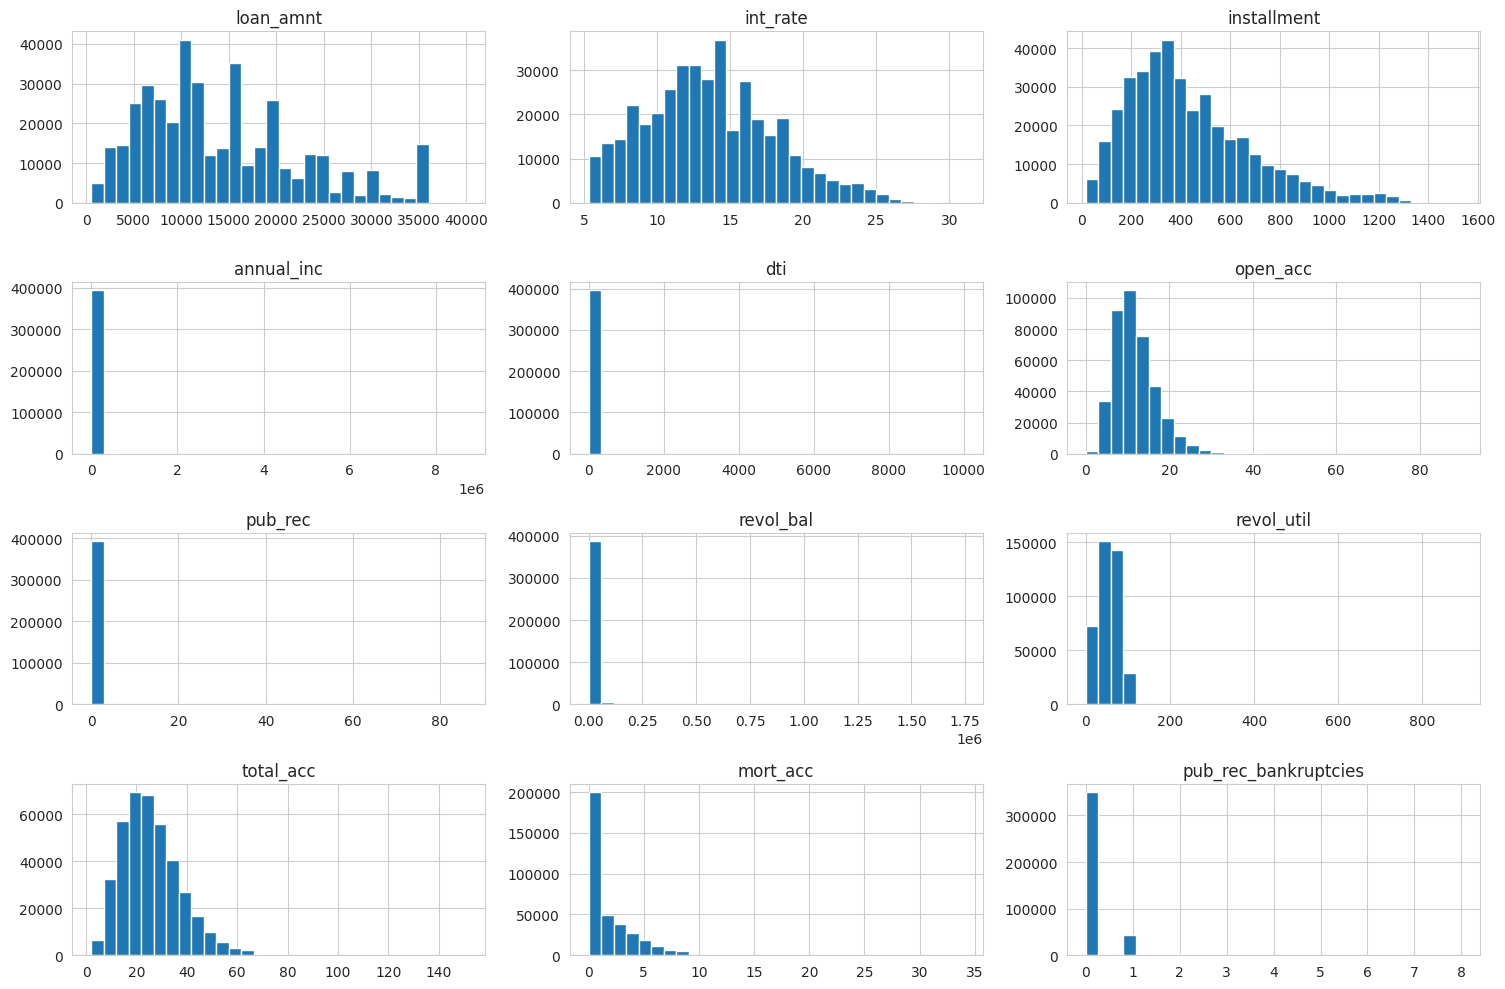

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Plot histograms for continuous variables
data[continuous_columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()



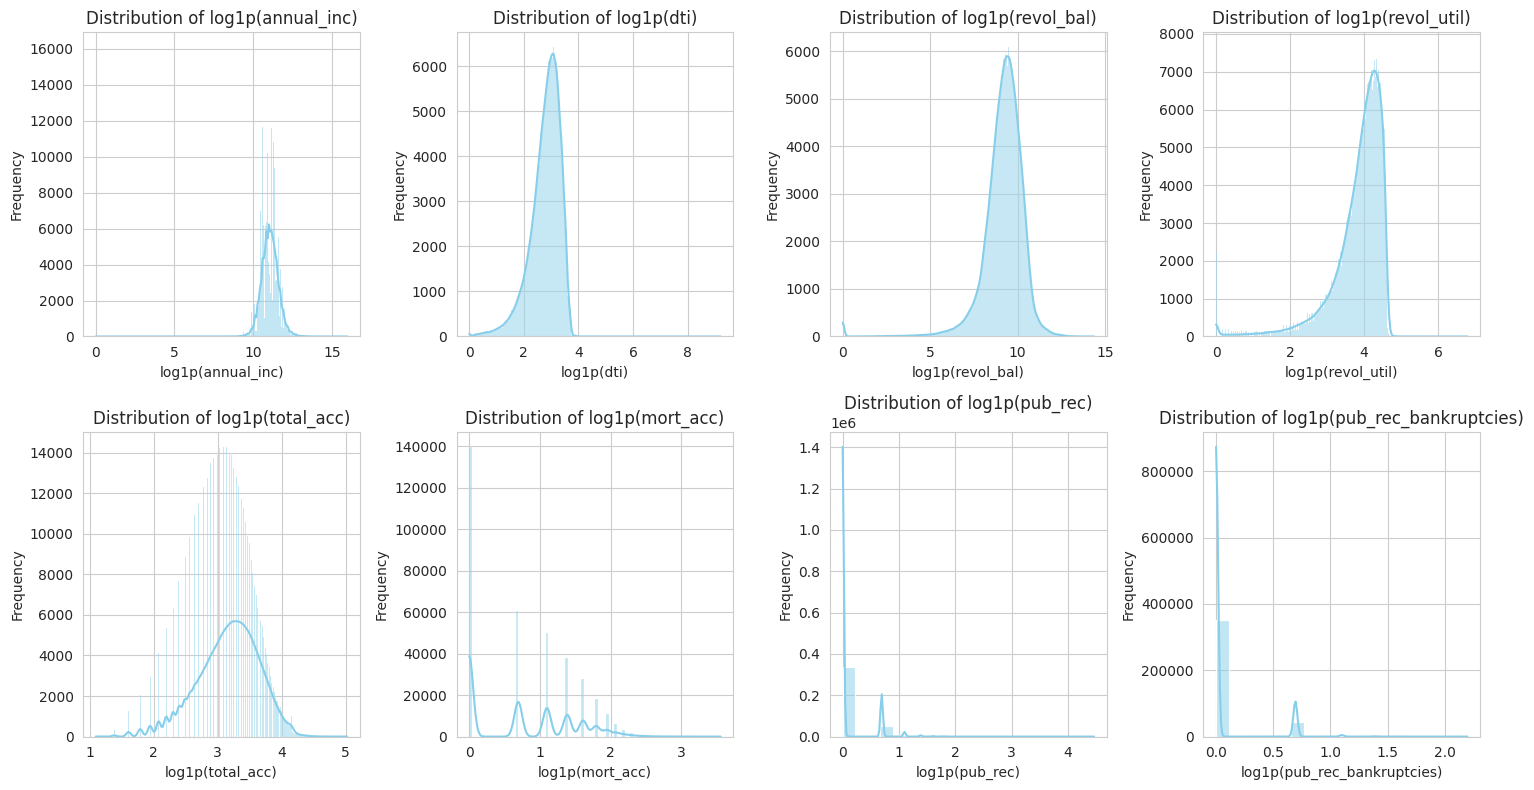

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style('whitegrid')

# List of features to log transform and plot
features_to_log_transform = [
   'annual_inc', 'dti',
    'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
    'pub_rec', 'pub_rec_bankruptcies'
]

# Create a new DataFrame with log-transformed features for visualization
# Use .copy() to avoid SettingWithCopyWarning
data_log_transformed = data[features_to_log_transform].apply(lambda x: np.log1p(x))

n_cols = len(features_to_log_transform)
n_cols_per_row = 4
n_rows = math.ceil(n_cols / n_cols_per_row)

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(features_to_log_transform):
    plt.subplot(n_rows, n_cols_per_row, i + 1)
    sns.histplot(data_log_transformed[col], kde=True, color='skyblue')
    plt.title(f'Distribution of log1p({col})')
    plt.xlabel(f'log1p({col})')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Insights from Histograms (Original and Log-Transformed)

Here are the insights gathered from visualizing the distributions of continuous features, considering both the original and log-transformed histograms. We will also estimate the typical range in the original scale based on the peaks in the log-transformed histograms:

*   **loan_amnt:**
  * The original histogram shows a mild right skew, with a concentration of loans at lower amounts and peaks around common loan values (e.g., 10,000, 15,000, 20,000).
  * Loan amount range from $500.0 to $40000.0

*   **int_rate:**
  * The original histogram shows that a mild right skew with majority of personal loans are rated from **~11% to 15%**.
  * Intrest rate range from 5% to 31%, noticeble variability.

*   **installment:**
  * Similar to loan amount, the original histogram is right-skewed, reflecting the distribution of loan amounts and interest rates in conformity with majority of installments in **~\\$320 to \\$400** range.
  * Installments can be seen as low as $16 to as high as $1533.

*   **annual_inc(Annual Income):**
  * The original histogram is extremely right-skewed, indicating majority of loan applicants come from lower to lower-middle income groups dataset ranging from $0 to Maximum Annual Income of $8,706,582.0   
  * The log-transformed histogram dramatically improves right skewness, showing a much more symmetrical distribution. The peak in the log-transformed plot (around 10.8 to 11.2) clearly reveals the most frequent order of magnitude for annual income, indicating that most borrowers have an annual income in the range of **~\\$49,000 to \\$73,000** (`exp(10.8)-1` to `exp(11.2)-1`).

*   **dti(Debt-to-Income ratio):**
  * The original Debt-to-Income ratio histogram is right-skewed with a long tail **indicating that a smaller portion of client's monthly income goes towards debt payments, reflecting better financial health and stability**.
  * The log-transformed histogram shows a peak around 2.8 to 3.1 thus yielding **~15 to 22** (`exp(2.8)-1` to `exp(3.1)-1`) in the orginal distribution.
  *  Minimum DTI: 0.0 and Maximum DTI: 9999.0(indicating some data entry issues)

*   **open_acc(Number of borrower's active credit lines):**
  * The original histogram shows a distribution concentrated at lower numbers of open credit lines, with a tail towards higher counts **indicating that a majority of borrowers have a lower number of credit lines**.
  * The log-transformed histogram is less skewed. The peak in the log-transformed plot (around 2.3 to 2.6) suggests a typical number of open credit accounts (in terms of order of magnitude) that borrowers have, likely between **~9 and 13** (`exp(2.3)-1` to `exp(2.6)-1`).
  * Minimum open_acc: 0.0
      Maximum open_acc: 90.0

*   **pub_rec(Negative records on borrower's public credit profile):**
  * The original and log-transformed histograms both show a very strong concentration at 0, **indicating that most borrowers have no public records. The peak at 0 is overwhelming**.
  * The log scale helps visualize the rare non-zero counts rather than indicating a typical non-zero range.
  * It ranges from 0 to 86

*   **revol_bal(Total credit balance):**
  * The original histogram is heavily right-skewed. The log-transformed histogram is much more symmetrical, revealing that typical revolving credit balances are clustered around a certain order of magnitude.
  * The peak in the log-transformed plot (around 9.0 to 9.5) suggests typical revolving balances in the range of **~\\$8,000 to \\$13,000** (`exp(9.0)-1` to `exp(9.5)-1`).
  * It ranges from $0  to  $1,743,266


*   **revol_util(Usage percentage of 'revolving' accounts like credit cards):**
  * The original histogram appears somewhat more uniform or slightly peaked in the middle, with values ranging from 0 to over 100.
  * The log-transformed histogram shows a slightly more defined central tendency. The peak in the log-transformed plot (around 3.7 to 4.0) suggests typical revolving utilization percentages in the range of **~40% to 54%** (`exp(3.7)-1` to `exp(4.0)-1`).
  * It ranges from 0 to 892.3

*   **total_acc(Total number of borrower's credit lines):**
  * The original histogram is right-skewed. The log-transformed histogram is more symmetrical, **indicating that the total number of credit lines borrowers have is typically clustered around a certain order of magnitude**.
  * The peak in the log-transformed plot (around 3.2 to 3.5) suggests a typical number of total credit accounts between **~23 and 32** (`exp(3.2)-1` to `exp(3.5)-1`).
  * It ranges from 2 to 151

*   **mort_acc(Number of borrower's mortgages):**
  * Similar to `pub_rec`(Negative records on borrower's public credit profile), the original and log-transformed histograms show a strong peak at 0, **indicating many borrowers have no mortgage accounts**.
  * The log scale helps to visualize the less frequent counts for borrowers with one or more mortgages, but does not clearly show a 'typical' non-zero range due to the concentration at 0.
  * It ranges from 0 to 34

*   **pub_rec_bankruptcies(Bankruptcy records for borrower):**
  * Both histograms show a very strong concentration at 0, **indicating that bankruptcy records are rare**.
  * Similar to `pub_rec`, the log scale helps visualize the infrequent non-zero counts rather than a typical non-zero range.
  * It ranges from 0 to 8

### Univariate Analysis of Categorical Variables

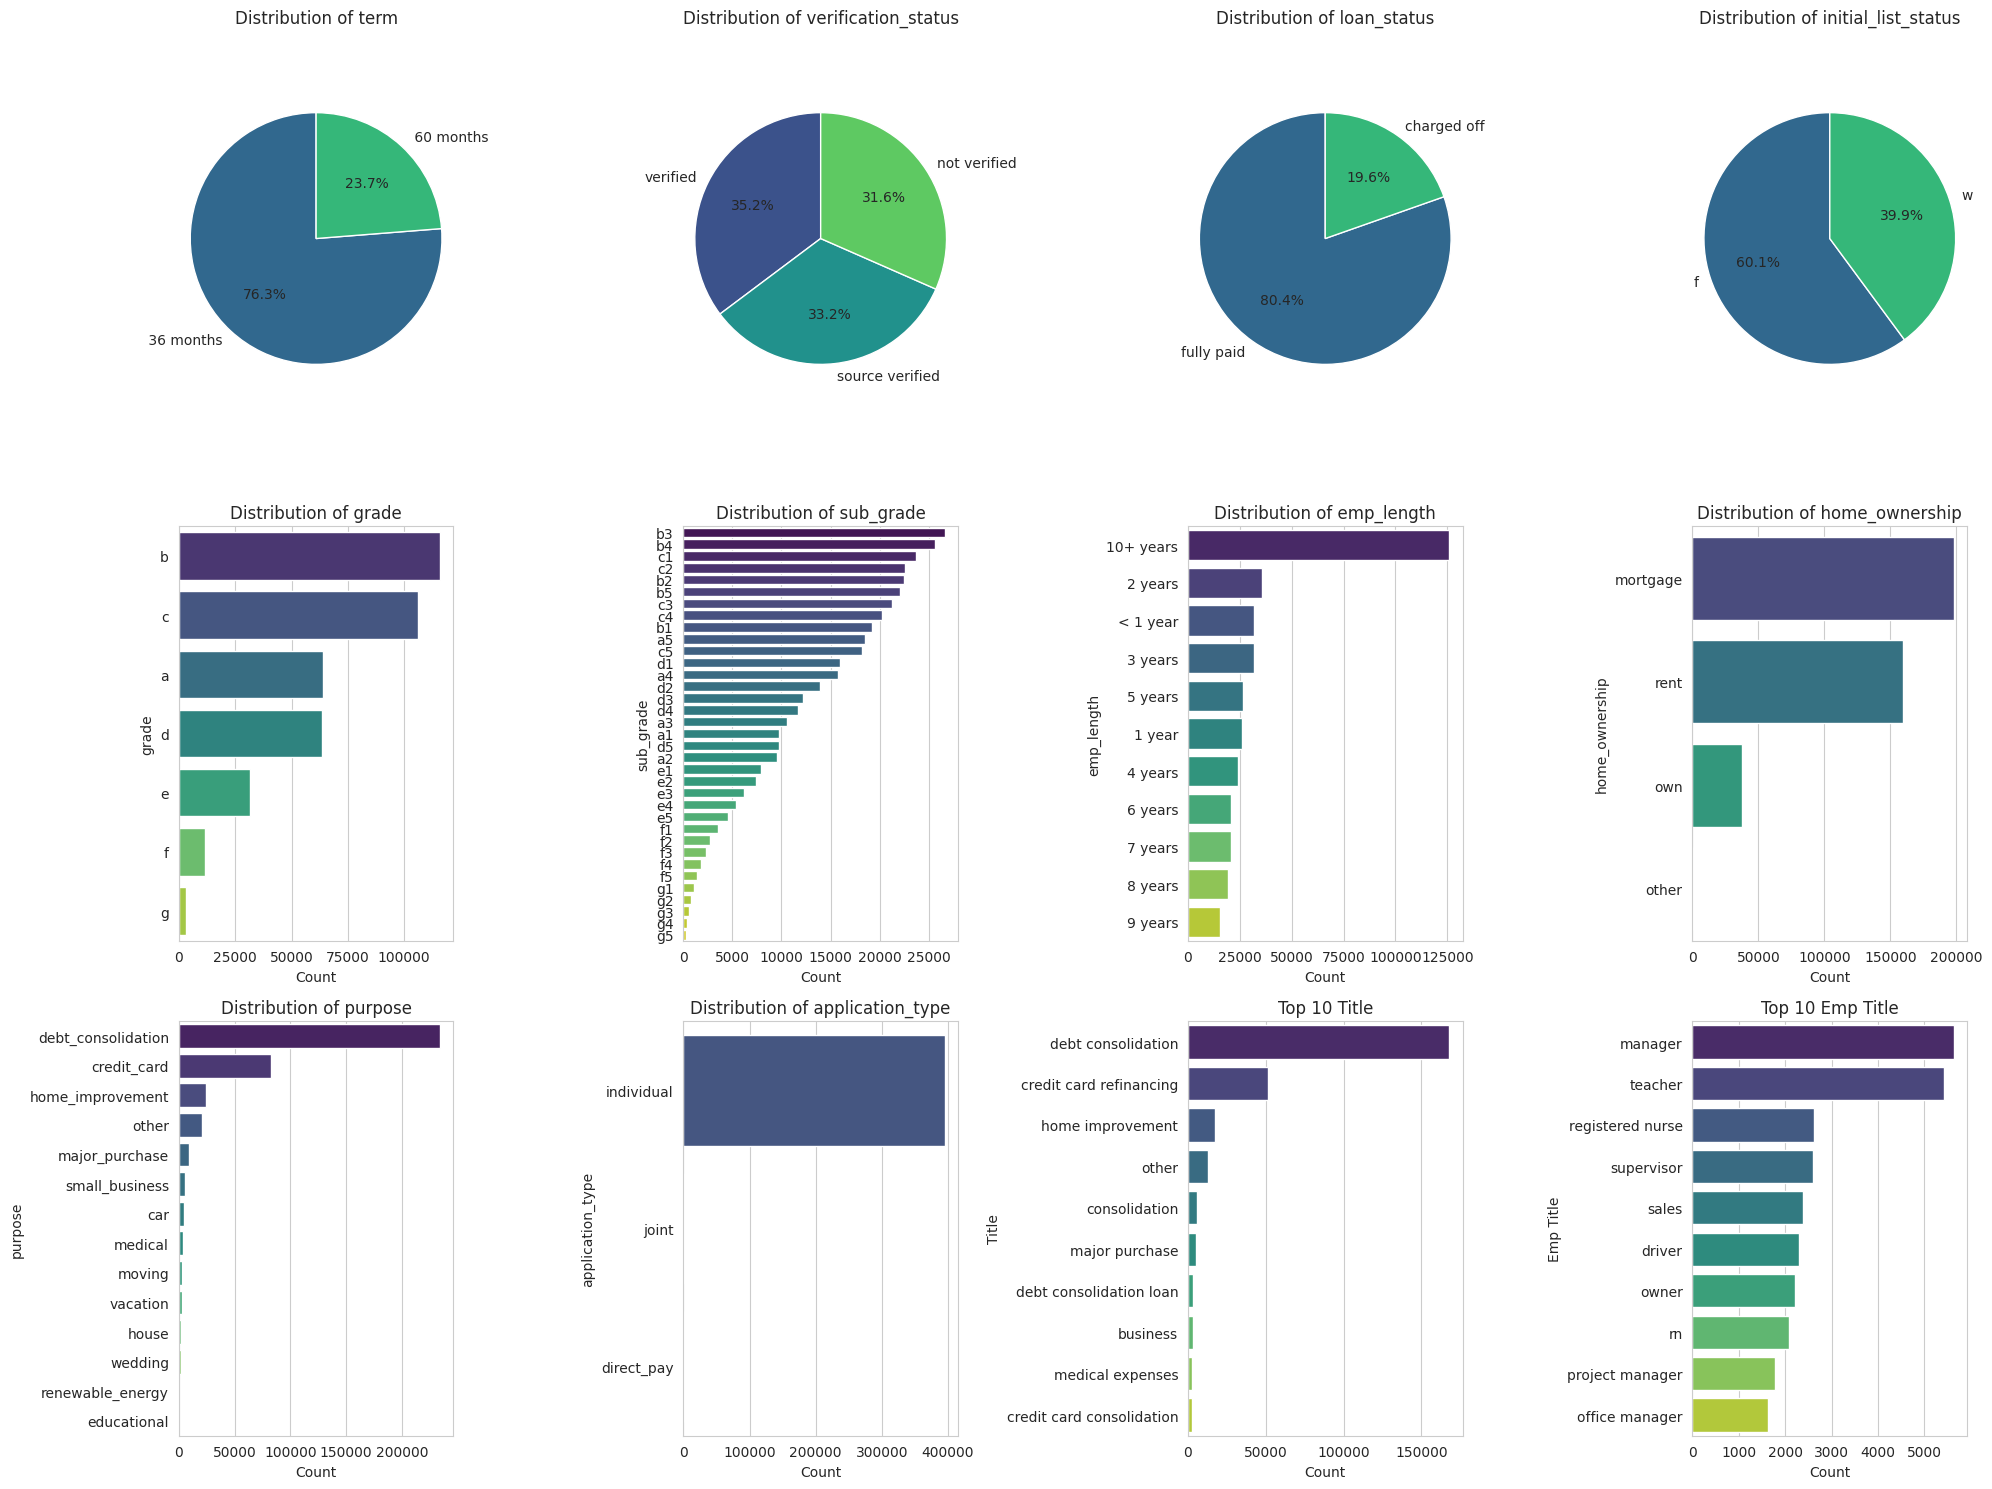

In [53]:
import math
sns.set_style('whitegrid')

# Define the columns for each plot type
pie_columns = ['term', 'verification_status', 'loan_status', 'initial_list_status']
countplot_columns = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'purpose', 'application_type']
top_10_countplot_columns = ['title', 'emp_title']

# Get the top 10 most frequent entries in 'title' and 'emp_title'
top_10_titles = data['title'].value_counts().nlargest(10)
top_10_emp_titles = data['emp_title'].value_counts().nlargest(10)

# Calculate the total number of plots
n_plots = len(pie_columns) + len(countplot_columns) + len(top_10_countplot_columns)

# Define the number of columns per row
n_cols_per_row = 4 # You can adjust this if needed

# Calculate the number of rows needed
n_rows = math.ceil(n_plots / n_cols_per_row)

# Increase the figure size to provide more space for subplots
plt.figure(figsize=(n_cols_per_row * 5, n_rows * 5)) # Adjust figure size dynamically

plot_index = 1 # Initialize subplot index

# Plot Pie charts
for col in pie_columns:
    # Check if the column exists in the DataFrame
    if col in data.columns:
        plt.subplot(n_rows, n_cols_per_row, plot_index)
        counts = data[col].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(counts)))
        plt.title(f'Distribution of {col}')
        plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
        plot_index += 1 # Increment index
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping pie plot.")


# Plot General Count plots
for col in countplot_columns:
    # Check if the column exists in the DataFrame
    if col in data.columns:
        plt.subplot(n_rows, n_cols_per_row, plot_index)
        sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plot_index += 1 # Increment index
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping count plot.")

# Plot Top 10 Count plots
for col in top_10_countplot_columns:
    # Check if the column exists in the DataFrame
    if col in data.columns:
        plt.subplot(n_rows, n_cols_per_row, plot_index)
        top_10_data = top_10_titles if col == 'title' else top_10_emp_titles
        sns.countplot(y=data[col], order=top_10_data.index, palette='viridis')
        plt.title(f'Top 10 {col.replace("_", " ").title()}') # Dynamic title
        plt.xlabel('Count')
        plt.ylabel(col.replace("_", " ").title()) # Dynamic ylabel
        plot_index += 1 # Increment index
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping top 10 count plot.")


plt.tight_layout()
plt.show()

#### Insights from Univariate Analysis of Categorical Variables

Based on the count plots and pie charts, here are some key observations regarding the distribution of categorical features:

*   **`term`**: A significant majority of loans are for **36 months**.
*   **`grade` and `sub_grade`**: There's a concentration of loans in the **lower risk grades (A and B)**, indicating LoanTap primarily lends to borrowers with lower to moderate credit risk.
*   **`emp_length`**: Borrowers with **"10+ years" of employment** are the most frequent, suggesting clients with extended employment history are most comfortable borrowing money.
*   **`home_ownership`**: The most common borrowers are either renting their primary residence or are mortgaing.
*   **`verification_status`**: Income verification is common, with a relatively even split between **'Not Verified', 'Source Verified', and 'Verified'**.
*   **`loan_status`**: About **80.4% of the borrowers have 'fully paid' their loans**, but a significant percentage are 'charged off', highlighting the **class imbalance** in the target variable.
*   **`purpose`**: **'debt\_consolidation' and 'credit\_card'** are the most common loan purposes.
*   **`initial_list_status`**:  Loans listed as already having received full funding or commitment ('f') dominante over the other ('w').
*   **`application_type`**: The vast majority of applications are **'INDIVIDUAL'**.
* **`emp_title`**: **Teachers, managers,** medical nurses and other working class people are major borrowers.


These insights provide a foundational understanding of the borrower and loan characteristics within the dataset.

###1.d Bivariate Analysis

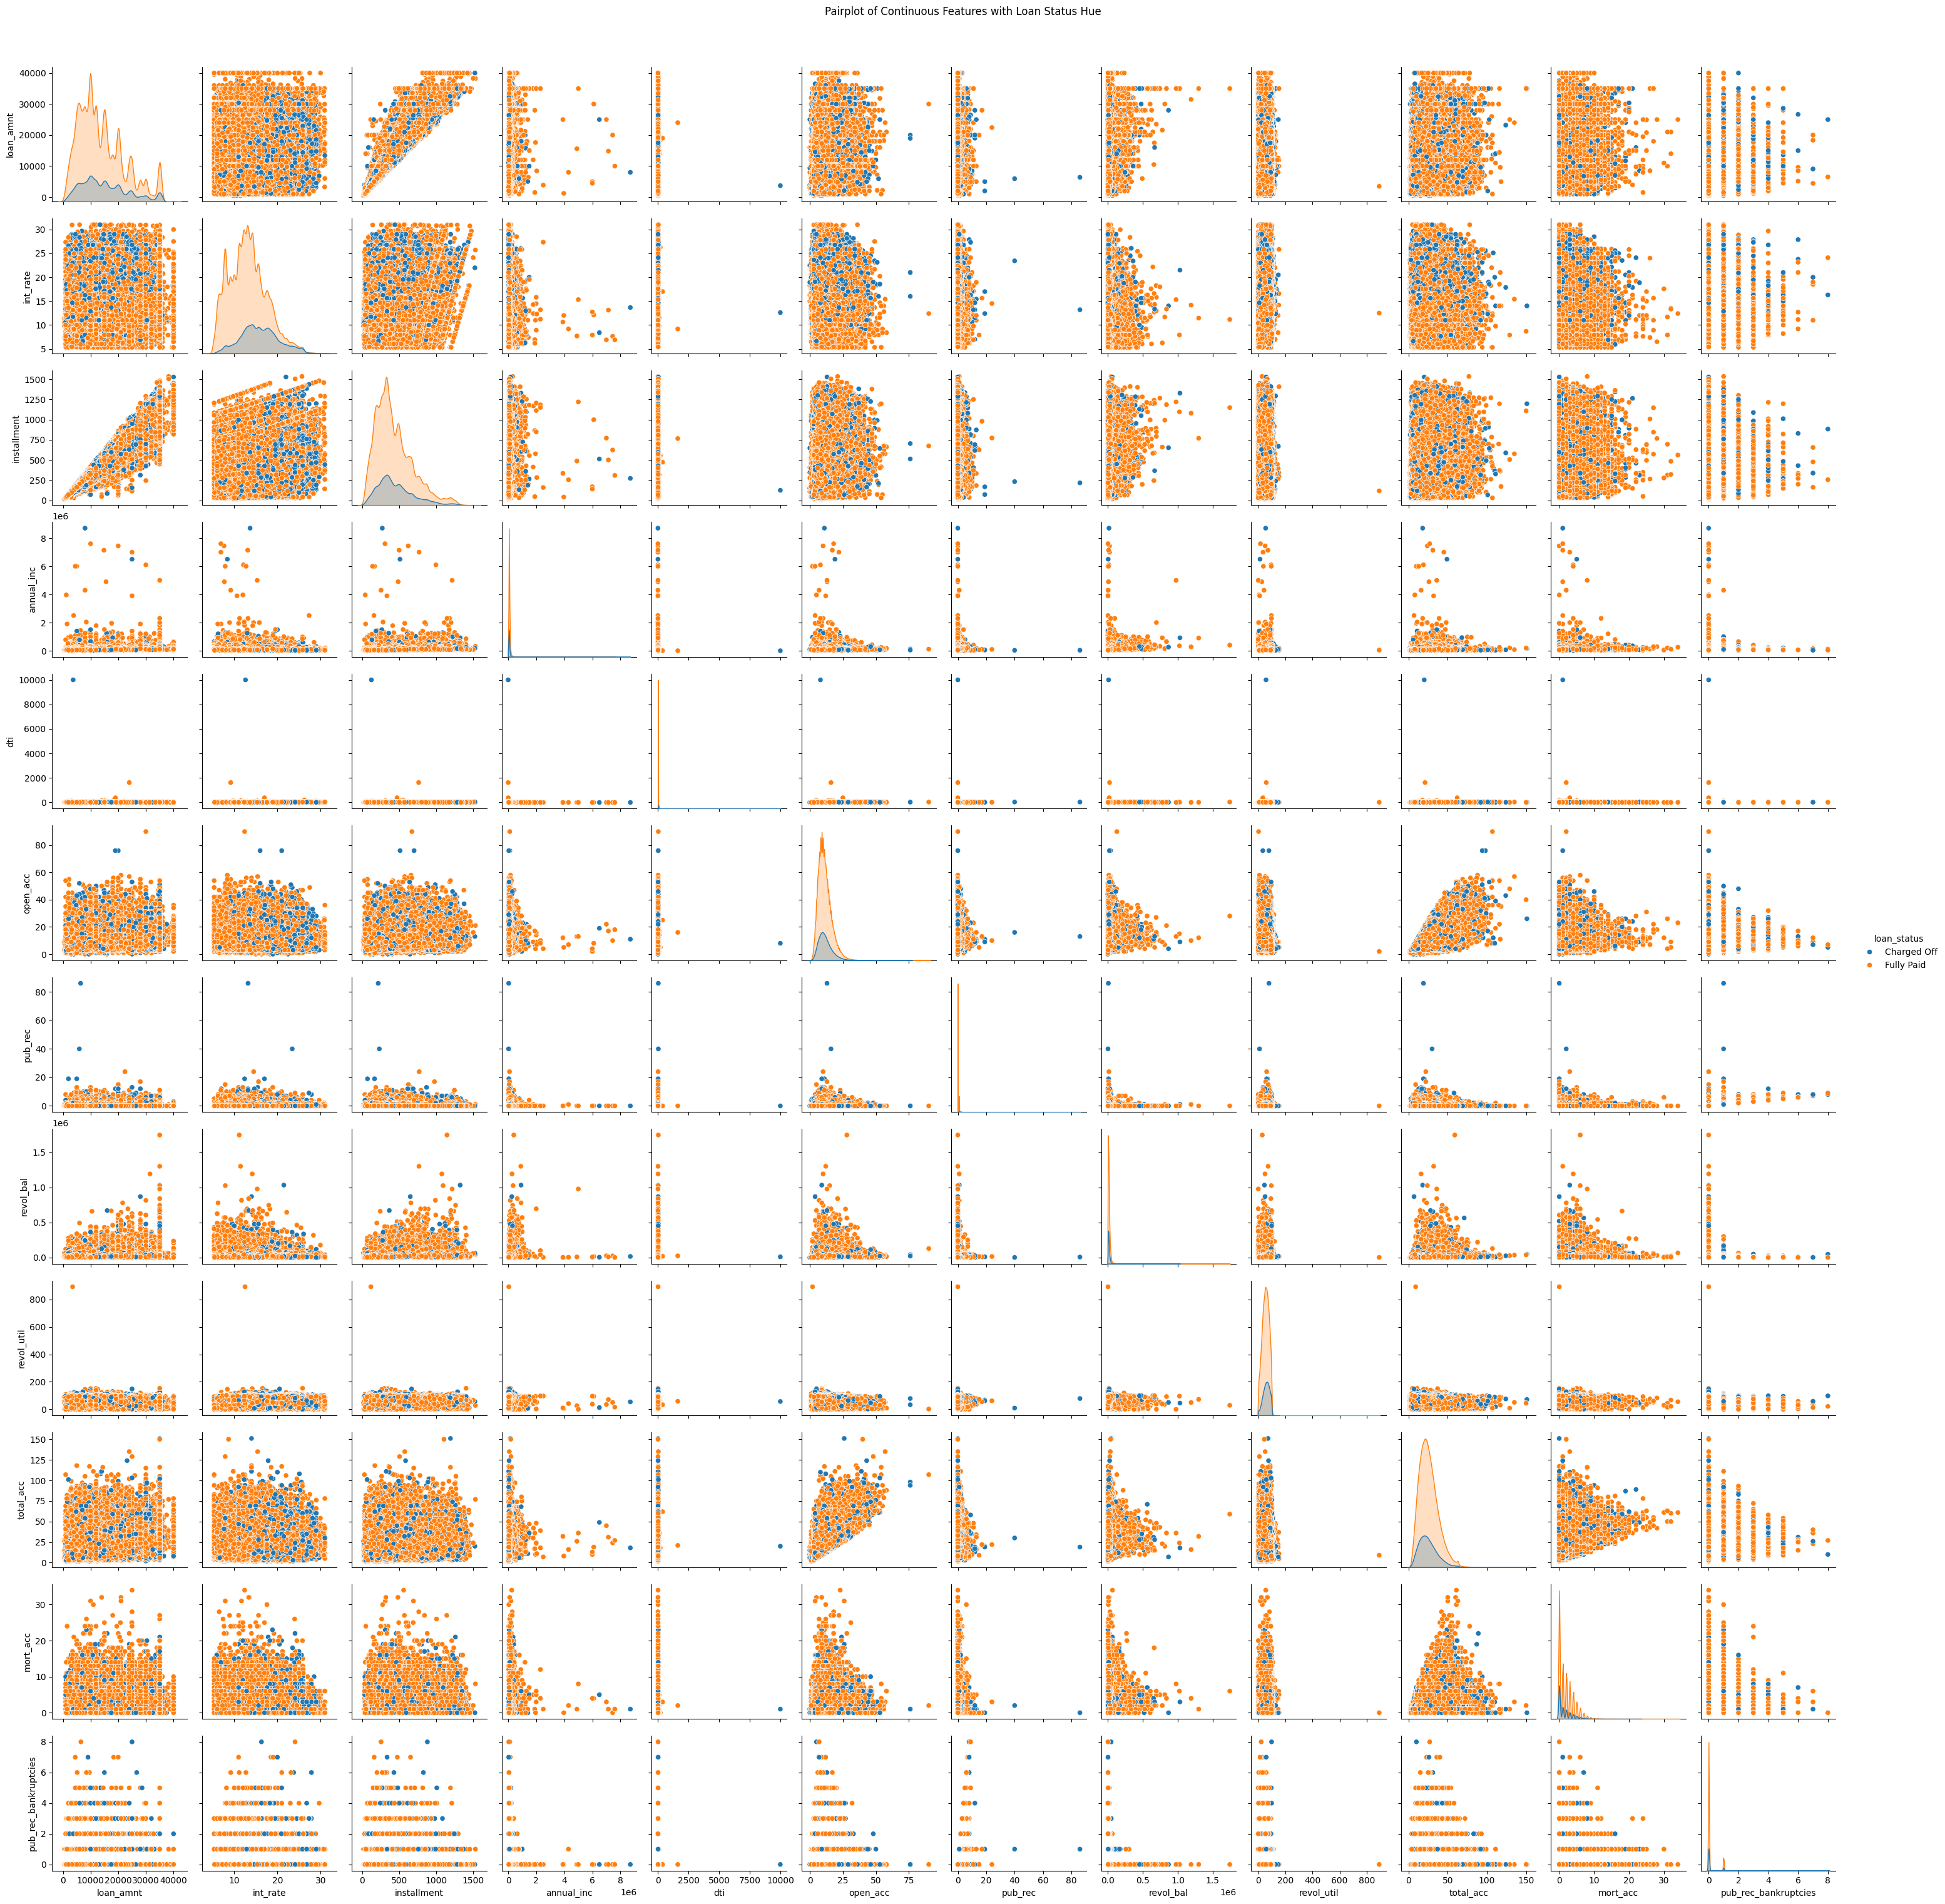

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(data[continuous_columns + ['loan_status']], hue='loan_status', diag_kind='kde')
plt.suptitle('Pairplot of Continuous Features with Loan Status Hue', y=1.02)
plt.show()

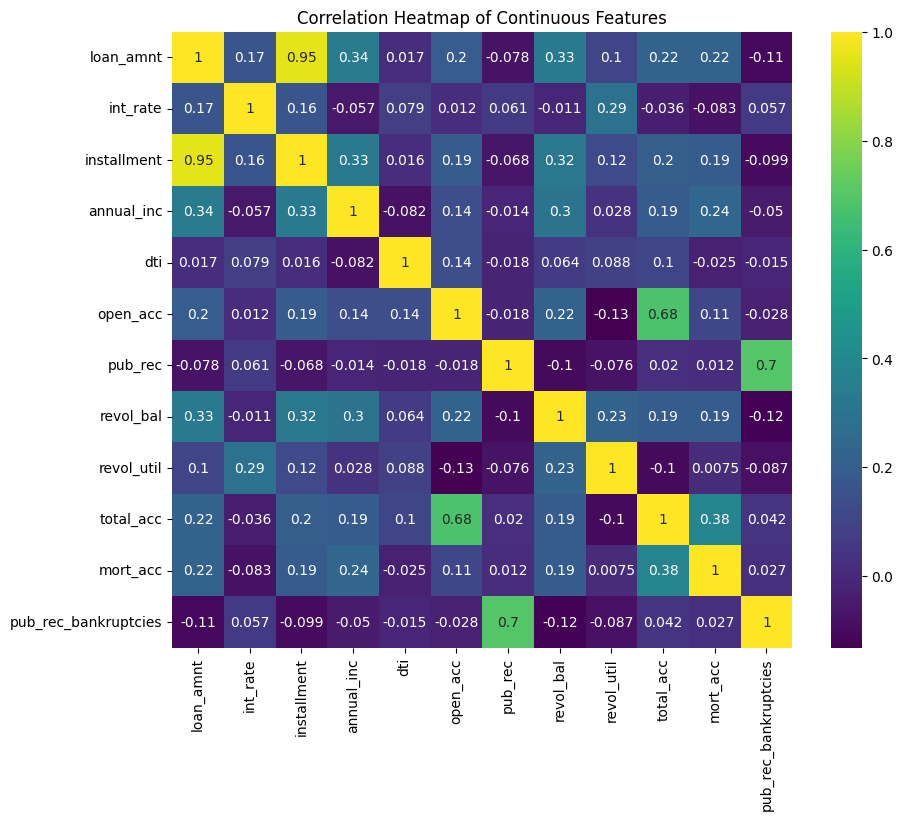

In [ ]:
plt.figure(figsize=(10, 8)) # Create a figure with the desired size
sns.heatmap(data[continuous_columns].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

#### Insights from Pairplots of Continuous Variables

Based on the pairplots visualizing the relationships between continuous features and the `loan_status`, here are some key observations:

*   **Individual Feature Distributions (Diagonal KDEs):**
    *   For most continuous features (`loan_amnt`, `int_rate`, `installment`, `annual_inc`, `dti`, `open_acc`, `revol_bal`, `revol_util`, `total_acc`, `mort_acc`, `pub_rec`, `pub_rec_bankruptcies`), 'fully paid' loans generally have a higher density across the distributions, reflecting the dataset's class imbalance and have right skew distribution.
    *   Loans with **higher `int_rate`** appear to have a slightly higher density of 'charged off' cases, implying there are more 'fully paid' loans than 'charged off' loans
    *   Borrowers with **lower annual income** seem to have a higher density.
    *   Features like `pub_rec` and `pub_rec_bankruptcies` are heavily skewed towards 0 for both statuses, indicating these events are less common but occur in both paid and charged-off loans.

*   **Relationships Between Features (Off-Diagonal Scatter Plots):**
    *   **Strong positive correlations is visible between `loan_amnt` and `installment`**.
    *  **Positive correlations is visible between `open_acc` and `total_acc`**
    *  **Positive correlations is visible between `pub_rec` and `pub_rec_bankruptcies`**
    * **Slight Negitive corealtion between `revol_util` and open_acc**.
    *  The scatter plots reflect the fact that a large number of clients fall within a lower and middle income bracket.
    *   Despite coming from lower income group borrowers are paying varied rate of intrest rates.
    *   Relationships between other feature pairs are less pronounced.
    *   The scatter plots for features like `pub_rec` and `pub_rec_bankruptcies` highlight the concentration of data points at 0, showing that **despite majority of borrowers coming from lower income group has less checkered financial background**.


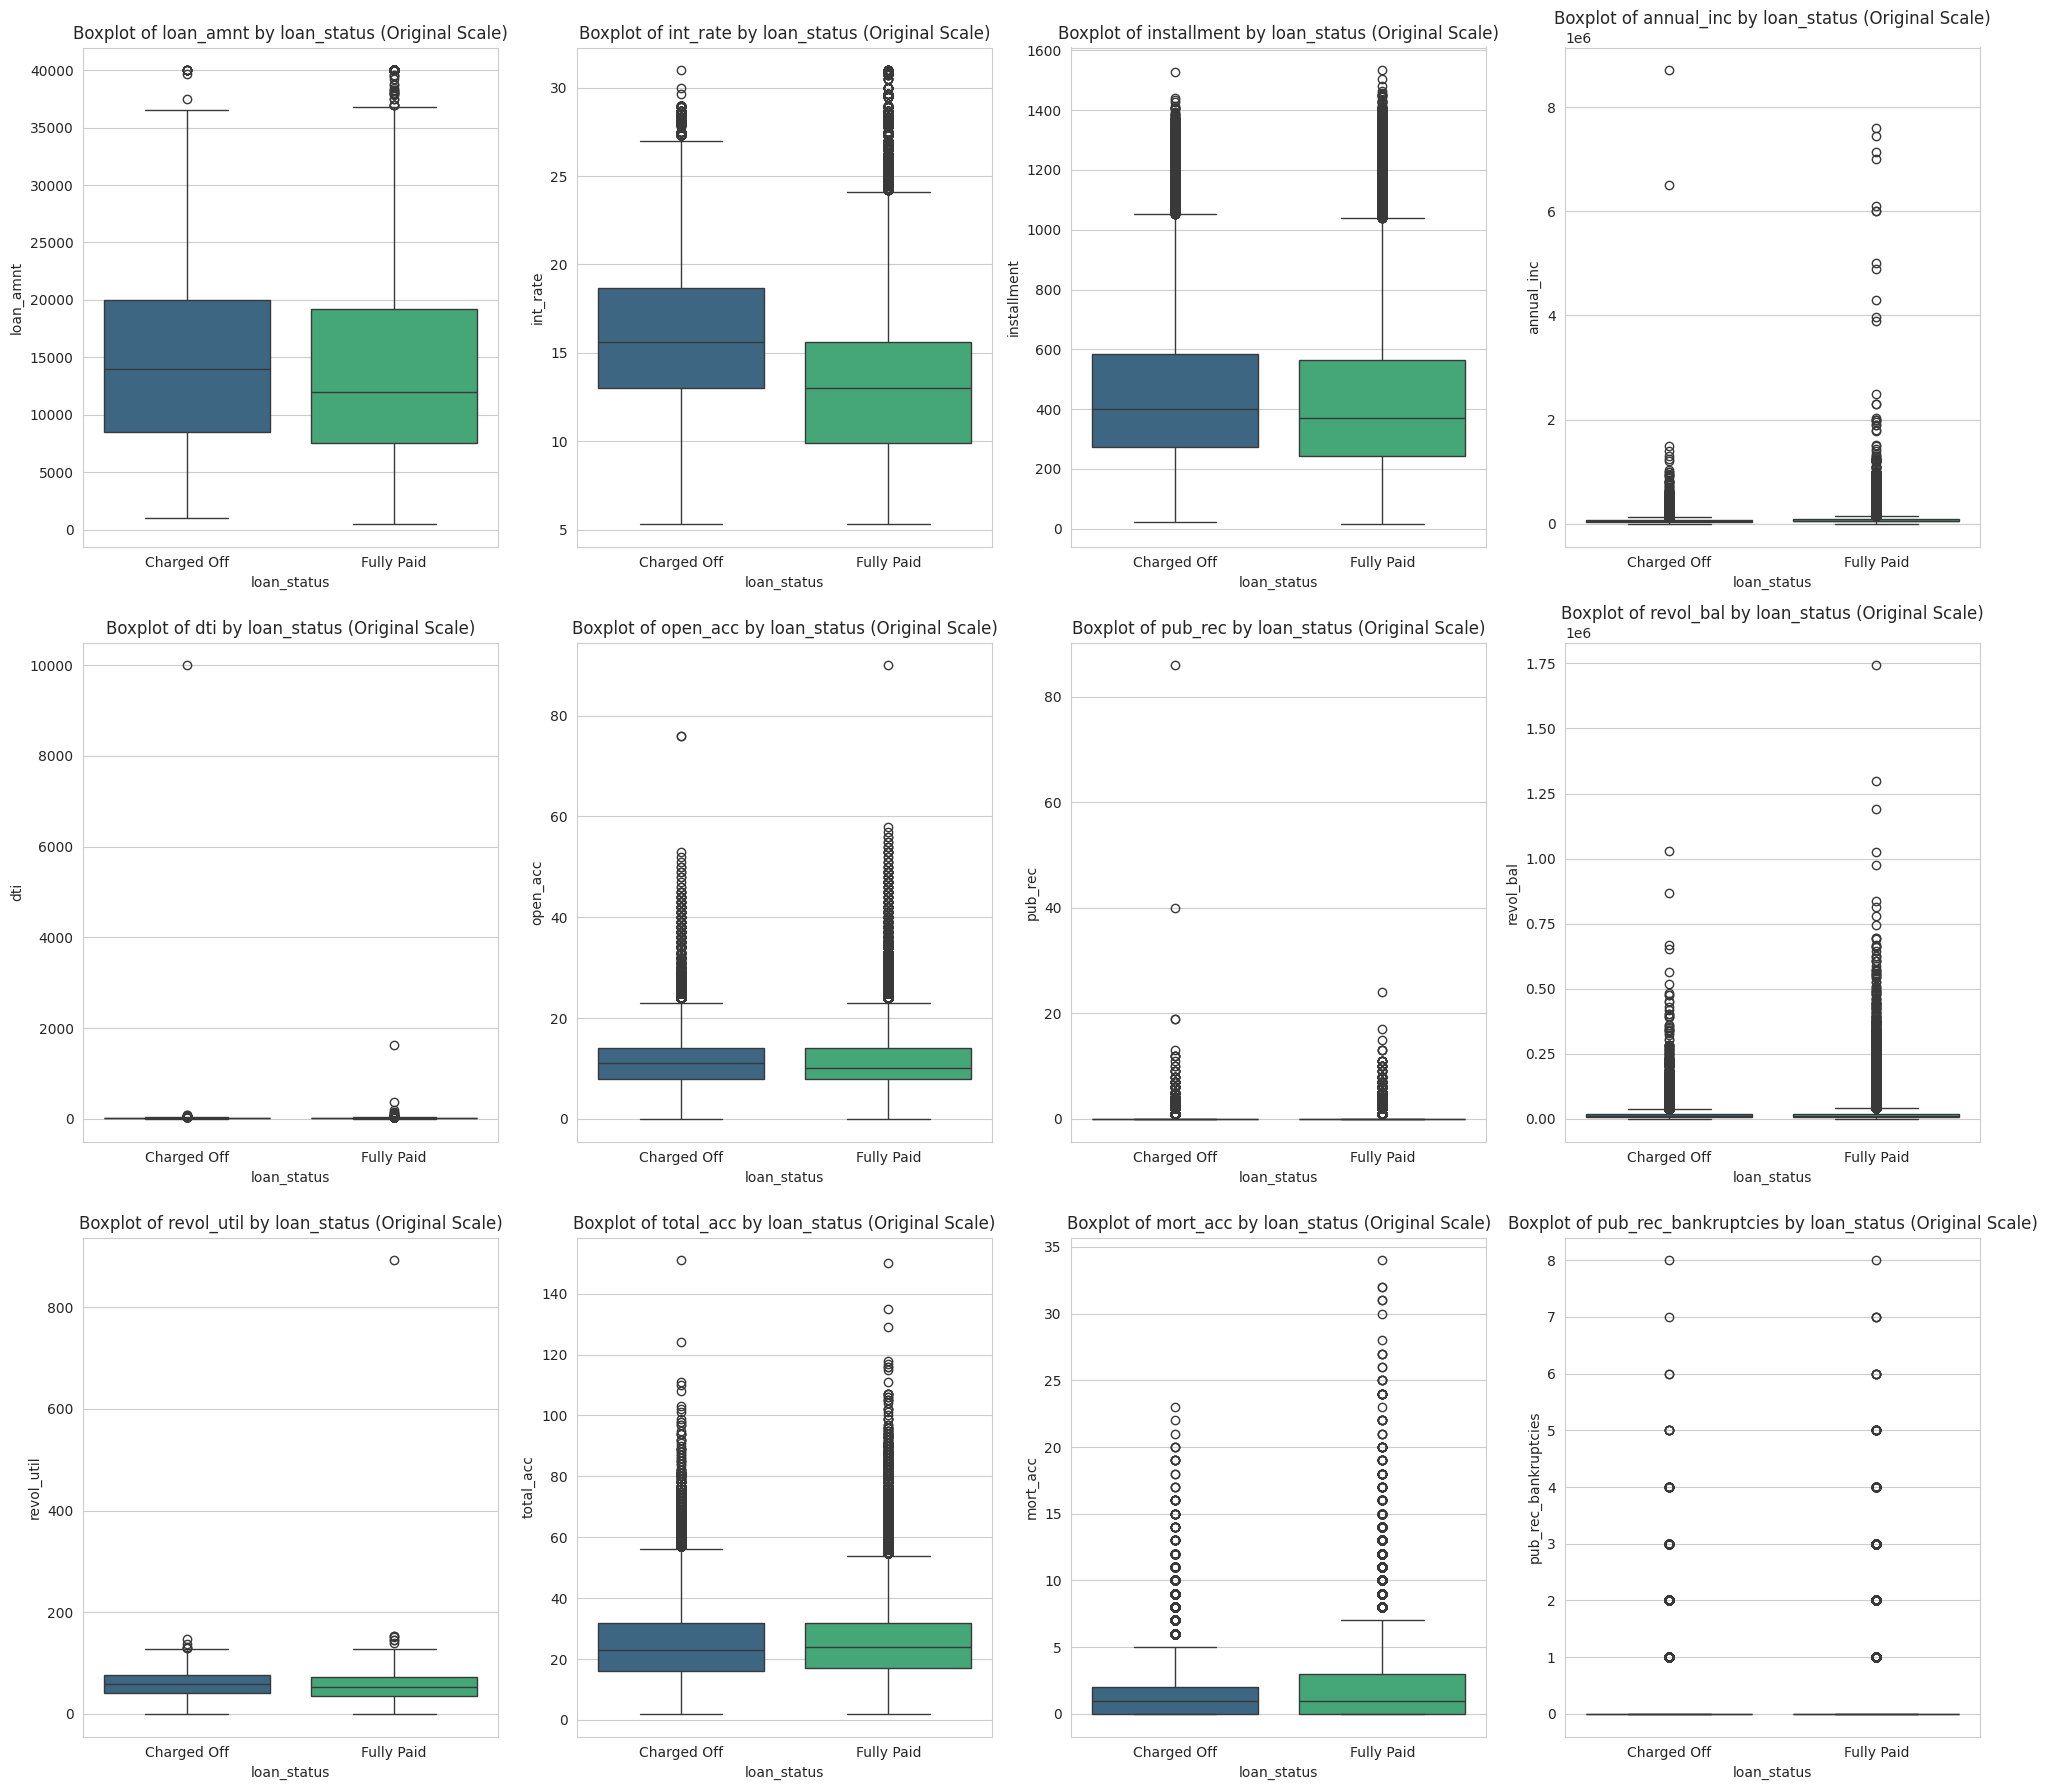

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Define the target variable
target_col = 'loan_status'

# Define the continuous columns to plot
# Using the list defined earlier in the notebook
# continuous_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

n_cols_per_row = 4  # You can adjust this number for layout
n_plots = len(continuous_columns)
n_rows = math.ceil(n_plots / n_cols_per_row)

plt.figure(figsize=(20, n_rows * 6)) # Adjust figure size as needed

for i, col in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols_per_row, i + 1)

    # Generate boxplot on the original scale
    sns.boxplot(data=data, x=target_col, y=data[col], palette='viridis')

    plt.title(f'Boxplot of {col} by {target_col} (Original Scale)')
    plt.xlabel(target_col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

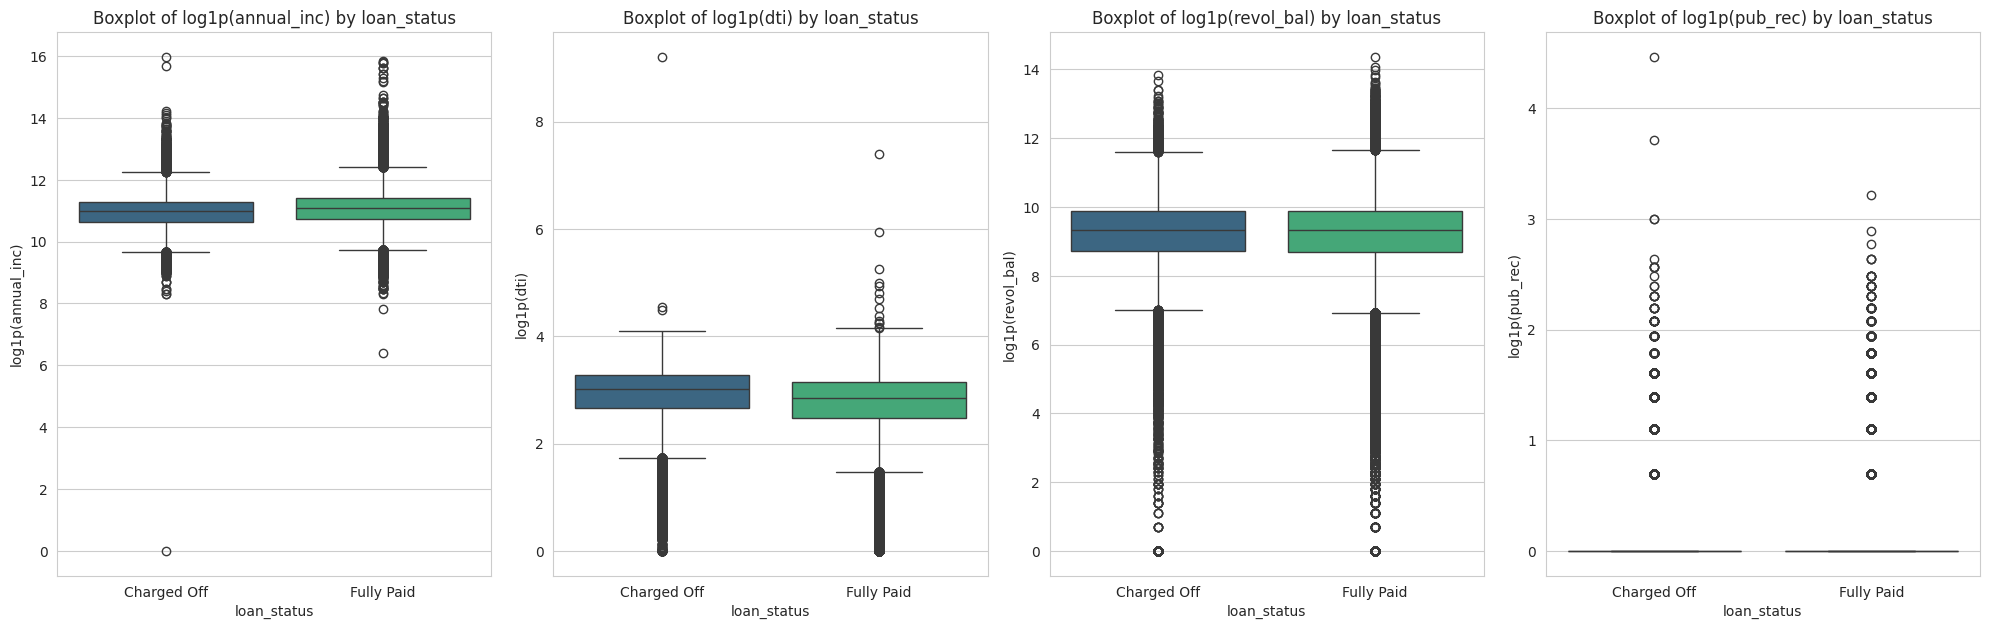

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def create_boxplots_for_continuous_features(data, continuous_cols, target_col='loan_status'):
    """
    Creates boxplots for each continuous feature against the target variable.

    Args:
        data (pd.DataFrame): The input DataFrame.
        continuous_cols (list): A list of names of the continuous columns.
        target_col (str): The name of the target column (default is 'loan_status').
    """
    n_cols_per_row = 4
    n_plots = len(continuous_cols)
    n_rows = math.ceil(n_plots / n_cols_per_row)

    plt.figure(figsize=(20, n_rows * 6))

    for i, col in enumerate(['annual_inc', 'dti', 'revol_bal', 'pub_rec']):
        plt.subplot(n_rows, n_cols_per_row, i + 1)
        # Use log1p transformation for skewed data for better visualization
        sns.boxplot(data=data, x=target_col, y=np.log1p(data[col]), palette='viridis')
        plt.title(f'Boxplot of log1p({col}) by {target_col}')
        plt.ylabel(f'log1p({col})')

    plt.tight_layout()
    plt.show()

# Create boxplots for continuous variables against the target variable 'loan_status'
create_boxplots_for_continuous_features(data, continuous_columns)

#### Insights from Box Plots of Continuous Variables

*   **`loan_amnt`:**
  * charged off loans tend to have a slightly higher median loan amounts.
  * Outliers are visible on the higher end for both statuses on crosschecking, indicating some loans for significantly larger amounts.

*   **`int_rate`:**
  * charged off loans consistently show a significantly higher median interest rate compared to fully paid loans. This indicates a negative correlation between interest rate and the probability of a loan being fully paid. Higher interest rates are associated with a lower chance of full repayment.
  * Outliers exist at higher interest rates for both statuses, but may be more frequent or extend to higher values for charged off loans.

*   **`installment`:**
  * Similar to loan amount, installment amounts tend to be slightly higher for fully paid loans.
  * Outliers are present at higher installment amounts for both statuses.

*   **`annual_inc` (log1p transformed):**
  * fully paid loans are associated with a higher median annual income compared to charged off loans.
  * Both statuses show outliers at the higher and lower end of annual income, with fully paid loans potentially having outliers in the very high income range.

*   **`dti` (log1p transformed):**
  * The median DTI appears somewhat similar for both loan statuses, suggesting it might not be as strong a single predictor as interest rate or income.
  * Outliers at very high DTI values are present for both statuses, but might be more spread out for charged off loans.

*   **`open_acc`:**
  * Borrowers with fully paid loans tend to have a slightly higher median number of open credit accounts.
  * Outliers exist at very high numbers of open accounts for both statuses.

*   **`pub_rec` & `pub_rec_bankruptcies`:**
  * Both features show a very strong concentration at 0 for both statuses, indicating these events are rare.
  * However, their presence (values > 0), particularly for outliers beyond the whiskers (indicating multiple public records or bankruptcies), is likely a strong negative indicator for loan repayment. Outliers are visible at 1 or more for both statuses, though they are infrequent.

*   **`revol_bal` (log1p transformed):**
  * fully paid loans tend to have a higher median revolving credit balance.
  * Outliers at very high revolving balances are visible for both statuses.

*   **`revol_util` (log1p transformed):**
  * The median revolving utilization appears somewhat similar for both loan statuses.
  * Outliers at very high utilization percentages are present for both statuses, including values significantly above 100% on the original scale.

*   **`total_acc` (log1p transformed):**
  * Borrowers with fully paid loans tend to have a higher median total number of credit accounts.
  * Outliers exist at very high numbers of total accounts for both statuses.

*   **`mort_acc` (log1p transformed):**
  * Many borrowers in both groups have no mortgages (median at 0). Outliers are visible for borrowers with multiple mortgages for both statuses.
  * The presence and number of mortgages might be related to loan status, but the strong concentration at 0 makes direct comparison challenging from the median alone.

**Summary:**

* The box plots reinforce that **`int_rate` and `annual_inc`** are strong predictors, showing clear differences in their distributions between 'fully paid' and 'charged off' loans. Features like `loan_amnt`, `installment`, `open_acc`, `revol_bal`, and `total_acc` also show some separation in their central tendencies, suggesting they are also relevant.

* Outliers might represent unique borrower profiles or circumstances that are relevant to predicting loan status. Removing them could lead to a loss of potentially important information.Outliers are present in many features for both loan statuses, highlighting the variability in borrower profiles.
* Impact on Logistic Regression: Logistic regression models are generally less sensitive to outliers than linear regression models because they model the probability using a sigmoid function, which can compress the effect of extreme values. However, extreme outliers, especially in features with strong relationships to the target variable, can still potentially influence the model's coefficients and predictions.

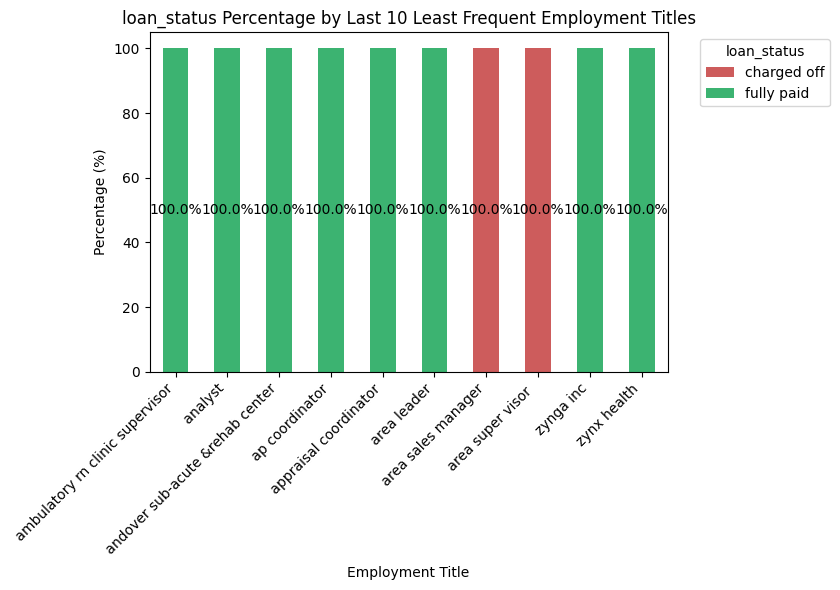

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the target variable
target_col = 'loan_status'
# Define custom colors
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}

# Get the value counts for emp_title
emp_title_counts = data['emp_title'].value_counts()

# Get the last 10 employment titles (least frequent)
last_10_emp_titles = emp_title_counts.tail(10).index.tolist()

# Filter the data to include only the last 10 employment titles
data_last_emp = data[data['emp_title'].isin(last_10_emp_titles)].copy()

# Create a crosstab with percentages of loan status within the last 10 emp_titles
crosstab_pct_last_emp = pd.crosstab(data_last_emp['emp_title'], data_last_emp[target_col], normalize='index') * 100

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
# Ensure the order for plotting matches the last 10 titles (by default sorted by count ascending)
crosstab_plot_order = crosstab_pct_last_emp.reindex(last_10_emp_titles)[['charged off', 'fully paid']]

ax = crosstab_plot_order.plot(kind='bar', stacked=True, color=[colors[col] for col in crosstab_plot_order.columns], ax=plt.gca())

plt.title(f'{target_col} Percentage by Last 10 Least Frequent Employment Titles')
plt.xlabel('Employment Title')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend

# Add percentage labels to the bars (optional, can clutter for very small counts)
for c in ax.containers:
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')


plt.show()

###Insights
* Ambulatory RN clinic Supervisor, Analysta, AP Coordinators, Appraisal Coordinator, Area Leaders, employees of Zynga Inc. and Zynx Health are the least frequent yet safest borrowers.
* Area sales manager and Area supervisors exhibit heavy charge off rate.


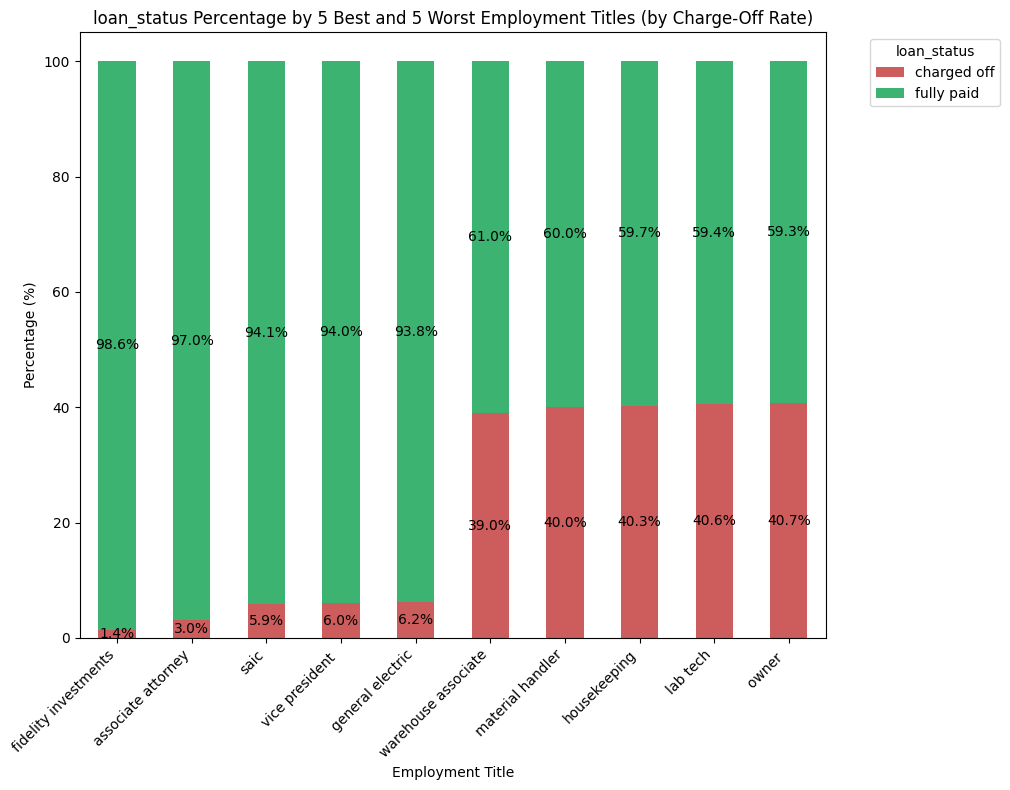

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the target variable
target_col = 'loan_status'
# Define custom colors
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}

# Calculate charge-off rate for each employment title
# Create a crosstab of emp_title and loan_status
crosstab_emp_loan = pd.crosstab(data['emp_title'], data[target_col])

# Calculate the percentage of 'charged off' within each emp_title
# Avoid division by zero for titles with no loans
crosstab_emp_loan['Total'] = crosstab_emp_loan['charged off'] + crosstab_emp_loan['fully paid']
crosstab_emp_loan['Charge_Off_Rate'] = crosstab_emp_loan['charged off'] / crosstab_emp_loan['Total']

# Remove titles with very few loans to avoid unreliable rates
# Define a minimum number of loans threshold (e.g., 50 loans)
min_loans_threshold = 50
crosstab_emp_loan_filtered = crosstab_emp_loan[crosstab_emp_loan['Total'] >= min_loans_threshold]

# Get the 5 best (lowest charge-off rate) and 5 worst (highest charge-off rate) titles
best_emp_titles = crosstab_emp_loan_filtered.nsmallest(5, 'Charge_Off_Rate').index.tolist()
worst_emp_titles = crosstab_emp_loan_filtered.nlargest(5, 'Charge_Off_Rate').index.tolist()

# Combine the lists of best and worst titles
selected_emp_titles = best_emp_titles + worst_emp_titles

# Filter the original data to include only the selected employment titles
data_selected_emp = data[data['emp_title'].isin(selected_emp_titles)].copy()

# Create a crosstab with percentages of loan status within the selected emp_titles
crosstab_pct_selected = pd.crosstab(data_selected_emp['emp_title'], data_selected_emp[target_col], normalize='index') * 100

# Ensure the order for plotting (optional, but helps visualize best vs worst)
# Sort by charge-off rate for a clearer visual comparison
crosstab_pct_selected['Charge_Off_Rate'] = crosstab_emp_loan_filtered.loc[crosstab_pct_selected.index, 'Charge_Off_Rate']
crosstab_pct_selected = crosstab_pct_selected.sort_values('Charge_Off_Rate')

# Plotting the stacked bar plot
plt.figure(figsize=(12, 8))
crosstab_plot_order = crosstab_pct_selected[['charged off', 'fully paid']] # Ensure order for stacking
ax = crosstab_plot_order.plot(kind='bar', stacked=True, color=[colors[col] for col in crosstab_plot_order.columns], ax=plt.gca())

plt.title(f'{target_col} Percentage by 5 Best and 5 Worst Employment Titles (by Charge-Off Rate)')
plt.xlabel('Employment Title')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend

# Add percentage labels to the bars (optional, can clutter)
for c in ax.containers:
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')


plt.show()

####Insights
* Fidelity Investments, Associate Attorney, Vice President, employees of Sais and General Electric exhibit lowest charge off rates.
* Warehouse associate, matweial handler, housekeeping, lab technicians and owners are high risk borrowers   

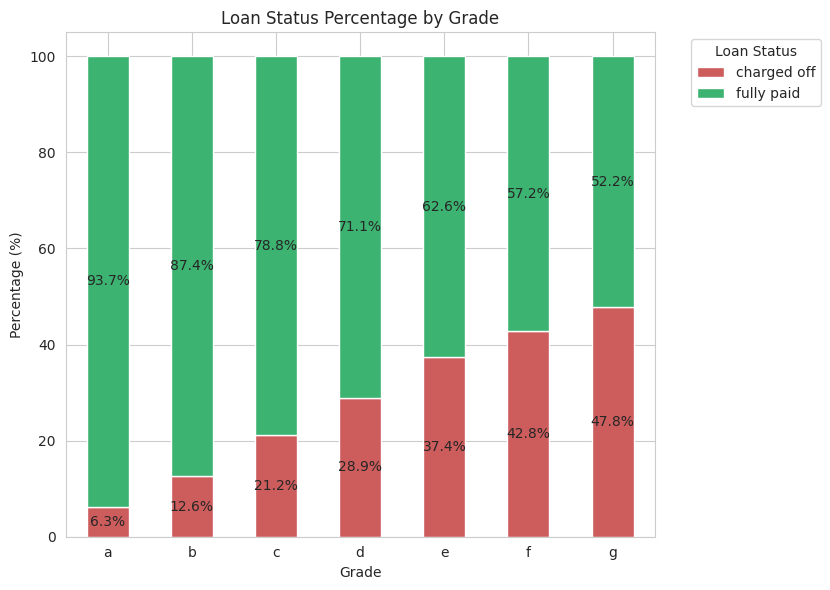

In [18]:
# Calculate the percentage of loan status within each grade

crosstab_loan_status_grade_pct = pd.crosstab(data['grade'], data['loan_status'], normalize='index') * 100

colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}

# Plotting the stacked bar plot
# Ensure the columns are in the desired order for stacking if needed, though alphabetical is default
# If 'charged off' should be at the bottom, ensure it comes first in the columns list
crosstab_plot_order = crosstab_loan_status_grade_pct[['charged off', 'fully paid']]


ax = crosstab_plot_order.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors[col] for col in crosstab_plot_order.columns])

plt.title('Loan Status Percentage by Grade')
plt.xlabel('Grade')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside plot
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend

# Add percentage labels to the bars
for c in ax.containers:
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')


plt.show()

###Insights:
* There is a very strong relationship between grade and loan_status.
* As the grade moves from A (lowest risk) to G (highest risk), the percentage of 'charged off' outcomes consistently and significantly increases.
* Grade A has the lowest charge-off rate, while Grade G has the highest.

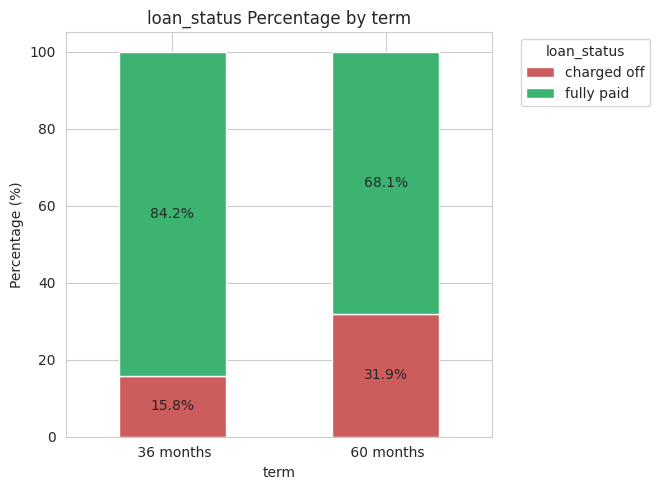

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Define the target variable
target_col = 'loan_status'
# Define custom colors (using the soothing palette we decided on)
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}

# Select the first categorical column to plot
col = 'term'

# Create a crosstab with percentages
crosstab_pct = pd.crosstab(data[col], data[target_col], normalize='index') * 100

# Plotting the stacked bar plot
plt.figure(figsize=(8, 5)) # Adjusted figure size for a single plot
crosstab_plot_order = crosstab_pct[['charged off', 'fully paid']]
ax = crosstab_plot_order.plot(kind='bar', stacked=True, color=[colors[col] for col in crosstab_plot_order.columns], ax=plt.gca())

plt.title(f'{target_col} Percentage by {col}')
plt.xlabel(col)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0) # Keep labels horizontal for 'term'
plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend

# Add percentage labels to the bars
for c in ax.containers:
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

###Insight
* Loans with a 60-month term have a noticeably higher percentage of 'charged off' outcomes compared to 36-month loans.
* The majority of loans are 36-month, and they have a lower charge-off rate.

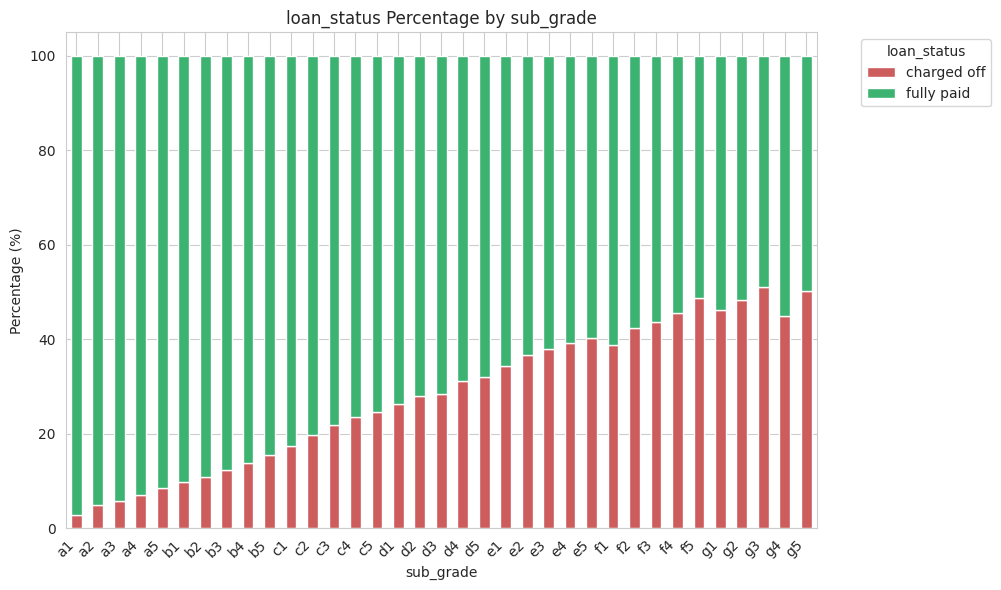

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the target variable
target_col = 'loan_status'
# Define custom colors (using the soothing palette we decided on)
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}

# Select the categorical column to plot
col = 'sub_grade'

# Create a crosstab with percentages
crosstab_pct = pd.crosstab(data[col], data[target_col], normalize='index') * 100

# Plotting the stacked bar plot
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
crosstab_plot_order = crosstab_pct[['charged off', 'fully paid']]
ax = crosstab_plot_order.plot(kind='bar', stacked=True, color=[colors[col] for col in crosstab_plot_order.columns], ax=plt.gca())

plt.title(f'{target_col} Percentage by {col}')
plt.xlabel(col)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend

# Add percentage labels to the bars (optional, can clutter)
# for c in ax.containers:
#     labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
#     ax.bar_label(c, labels=labels, label_type='center')

plt.show()

###Insights:
* Provides a more granular view of the grade relationship. Within each main grade (A, B, C, etc.), there is a general trend of increasing charge-off rates(risky loans) as the sub_grade moves towards the higher-numbered subcategories (e.g., B1 vs. B5).
* This reinforces the ordinal and asscending nature of the risk rating.
* Despite A being the least risky grade of loans, B is the most popular grade among borrowers.

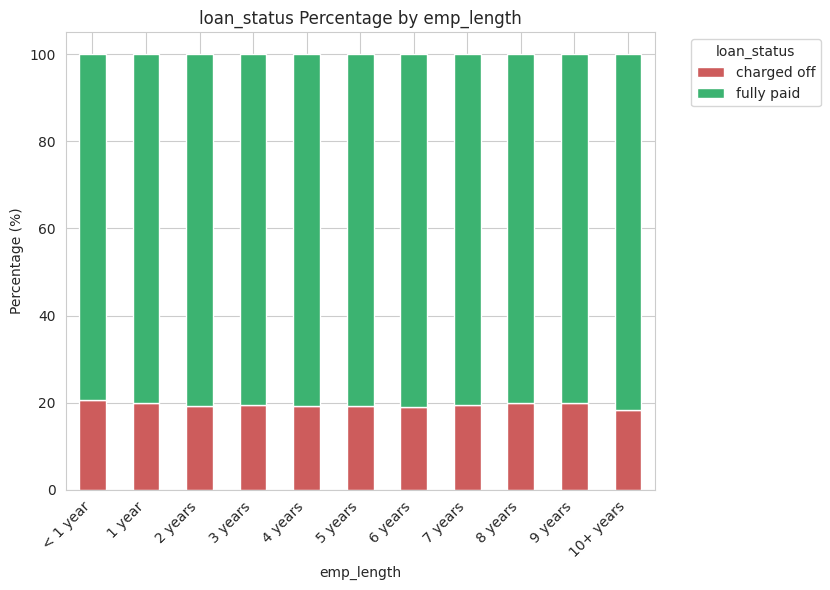

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the target variable
target_col = 'loan_status'
# Define custom colors (using the soothing palette we decided on)
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}

# Select the categorical column to plot
col = 'emp_length'

# Create a crosstab with percentages
crosstab_pct = pd.crosstab(data[col], data[target_col], normalize='index') * 100

# Plotting the stacked bar plot - order by emp_length
# Define the desired order for emp_length
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
crosstab_pct_ordered = pd.crosstab(data[col], data[target_col], normalize='index').reindex(emp_length_order) * 100


plt.figure(figsize=(10, 6)) # Adjust figure size as needed
crosstab_plot_order = crosstab_pct_ordered[['charged off', 'fully paid']]
ax = crosstab_plot_order.plot(kind='bar', stacked=True, color=[colors[col] for col in crosstab_plot_order.columns], ax=plt.gca())

plt.title(f'{target_col} Percentage by {col}')
plt.xlabel(col)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend

# Add percentage labels to the bars (optional, can clutter)
# for c in ax.containers:
#     labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
#     ax.bar_label(c, labels=labels, label_type='center')


plt.show()

###Insights:
* While the differences are less dramatic than with grade or term, there appears to be a slight trend where borrowers with shorter employment lengths (e.g., < 1 year) might have a marginally higher percentage of 'charged off' loans compared to those with longer employment (e.g., 10+ years).
* However, the variation across most employment lengths is not extremely pronounced.

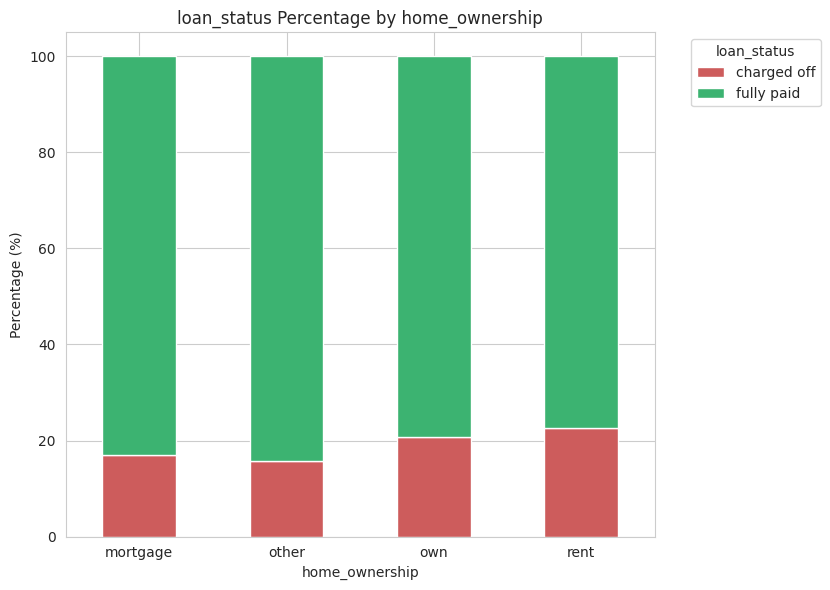

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the target variable
target_col = 'loan_status'
# Define custom colors (using the soothing palette we decided on)
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}

# Select the categorical column to plot
col = 'home_ownership'

# Create a crosstab with percentages
crosstab_pct = pd.crosstab(data[col], data[target_col], normalize='index') * 100

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
crosstab_plot_order = crosstab_pct[['charged off', 'fully paid']]
ax = crosstab_plot_order.plot(kind='bar', stacked=True, color=[colors[col] for col in crosstab_plot_order.columns], ax=plt.gca())

plt.title(f'{target_col} Percentage by {col}')
plt.xlabel(col)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0) # Keep labels horizontal
plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend

# Add percentage labels to the bars (optional, can clutter)
# for c in ax.containers:
#     labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
#     ax.bar_label(c, labels=labels, label_type='center')

plt.show()

###Insights:
* 'RENT' and 'OWN' categories seem to have slightly higher charge-off rates compared to 'MORTGAGE'.
* The 'OTHER' and 'NONE'  categories have very few observations, making the percentage less reliable, but they appear to have relatively high charge-off rates, although based on small sample sizes.
* The `ANY` seem to be the safest, having fully paid their loan,need to be further investigated.


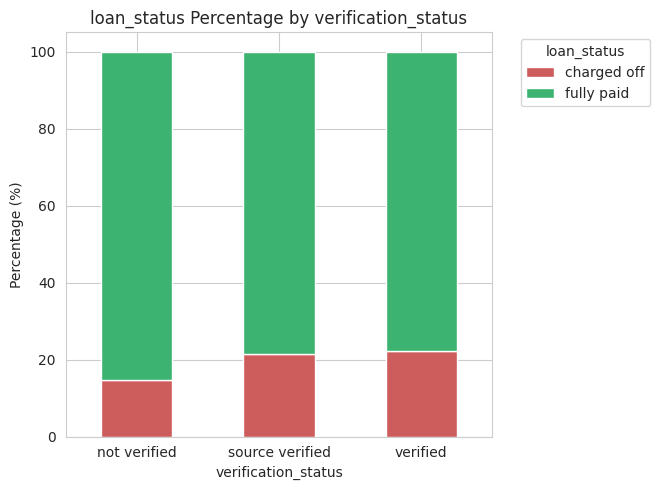

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the target variable
target_col = 'loan_status'
# Define custom colors (using the soothing palette we decided on)
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}

# Select the categorical column to plot
col = 'verification_status'

# Create a crosstab with percentages
crosstab_pct = pd.crosstab(data[col], data[target_col], normalize='index') * 100

# Plotting the stacked bar plot
plt.figure(figsize=(8, 5)) # Adjust figure size as needed
crosstab_plot_order = crosstab_pct[['charged off', 'fully paid']]
ax = crosstab_plot_order.plot(kind='bar', stacked=True, color=[colors[col] for col in crosstab_plot_order.columns], ax=plt.gca())

plt.title(f'{target_col} Percentage by {col}')
plt.xlabel(col)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0) # Keep labels horizontal
plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend

# Add percentage labels to the bars (optional, can clutter)
# for c in ax.containers:
#     labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
#     ax.bar_label(c, labels=labels, label_type='center')

plt.show()

###Insights:
* Loans with 'Verified' income appear to have a slightly higher percentage of 'charged off' outcomes compared to 'Source Verified' and 'Not Verified'.
* This might seem counter-intuitive and could suggest that borrowers whose income was verified might have had other risk factors that prompted the verification, or there could be other hidden factors.

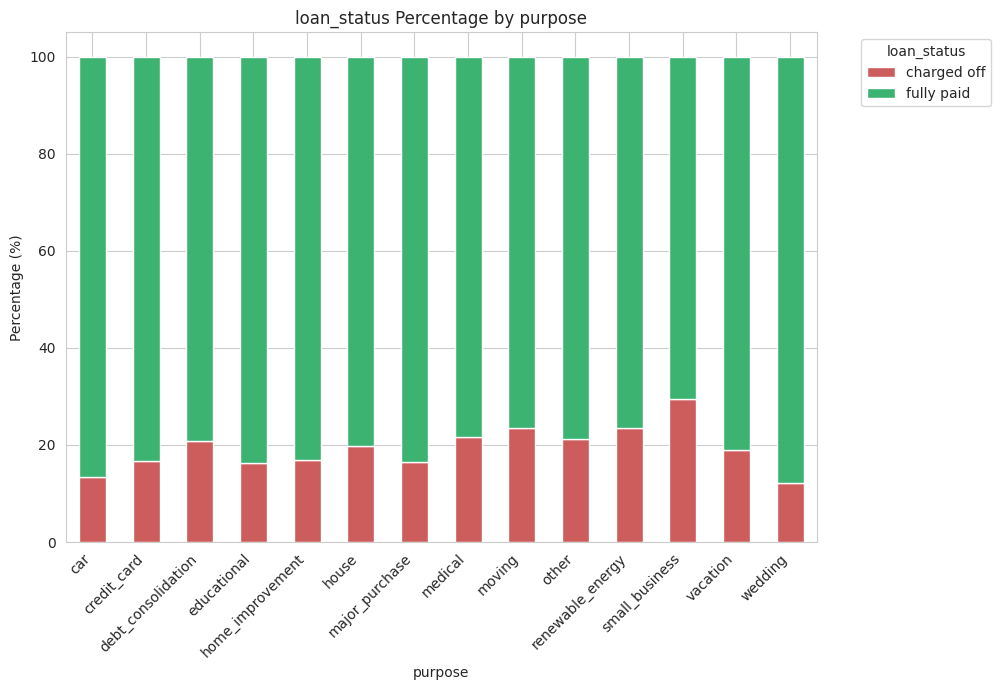

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the target variable
target_col = 'loan_status'
# Define custom colors (using the soothing palette we decided on)
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}

# Select the categorical column to plot
col = 'purpose'

# Create a crosstab with percentages
crosstab_pct = pd.crosstab(data[col], data[target_col], normalize='index') * 100

# Plotting the stacked bar plot
plt.figure(figsize=(12, 7)) # Adjust figure size for more categories
crosstab_plot_order = crosstab_pct[['charged off', 'fully paid']]
ax = crosstab_plot_order.plot(kind='bar', stacked=True, color=[colors[col] for col in crosstab_plot_order.columns], ax=plt.gca())

plt.title(f'{target_col} Percentage by {col}')
plt.xlabel(col)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend

# Add percentage labels to the bars (optional, can clutter)
# for c in ax.containers:
#     labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
#     ax.bar_label(c, labels=labels, label_type='center')

plt.show()

###Insights:
* Certain loan purposes show different risk profiles. 'small_business' and 'renewable_energy' appear to have noticeably higher percentages of 'charged off' outcomes compared to common purposes like 'debt_consolidation' and 'credit_card'.
* 'educational' and 'major_purchase' also seem to have relatively higher charge-off rates.

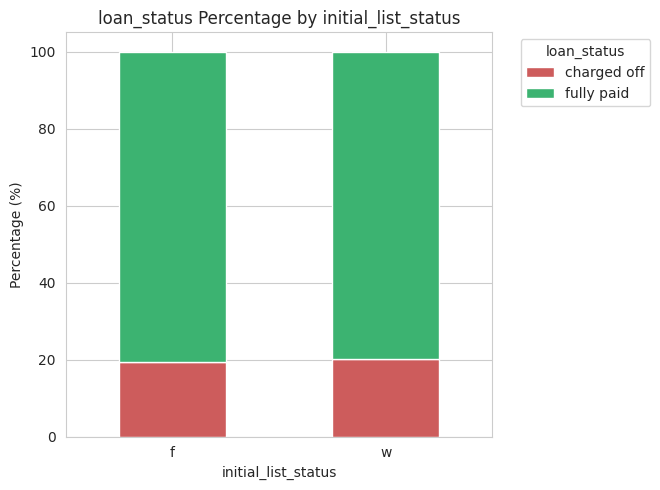

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the target variable
target_col = 'loan_status'
# Define custom colors (using the soothing palette we decided on)
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}

# Select the categorical column to plot
col = 'initial_list_status'

# Create a crosstab with percentages
crosstab_pct = pd.crosstab(data[col], data[target_col], normalize='index') * 100

# Plotting the stacked bar plot
plt.figure(figsize=(8, 5)) # Adjust figure size as needed
crosstab_plot_order = crosstab_pct[['charged off', 'fully paid']]
ax = crosstab_plot_order.plot(kind='bar', stacked=True, color=[colors[col] for col in crosstab_plot_order.columns], ax=plt.gca())

plt.title(f'{target_col} Percentage by {col}')
plt.xlabel(col)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0) # Keep labels horizontal
plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend

# Add percentage labels to the bars (optional, can clutter)
# for c in ax.containers:
#     labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
#     ax.bar_label(c, labels=labels, label_type='center')

plt.show()

###Insights:
* The two statuses ('f' and 'w') show a difference in charge-off rates, with one ('w') having a slightly lower percentage of 'charged off' loans than the other ('f').

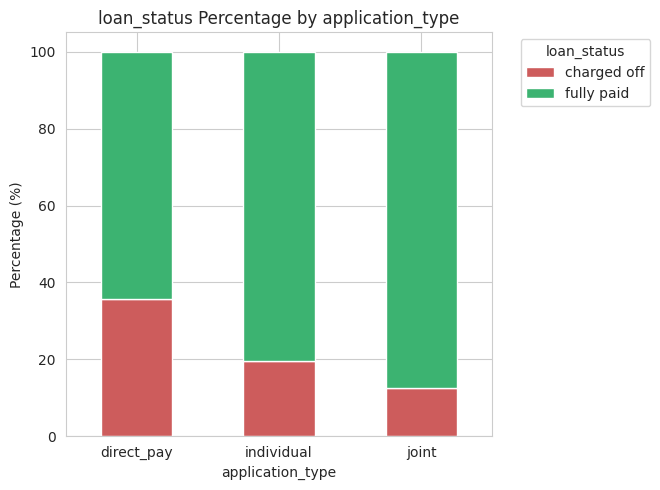

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the target variable
target_col = 'loan_status'
# Define custom colors (using the soothing palette we decided on)
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}

# Select the categorical column to plot
col = 'application_type'

# Create a crosstab with percentages
crosstab_pct = pd.crosstab(data[col], data[target_col], normalize='index') * 100

# Plotting the stacked bar plot
plt.figure(figsize=(8, 5)) # Adjust figure size as needed
crosstab_plot_order = crosstab_pct[['charged off', 'fully paid']]
ax = crosstab_plot_order.plot(kind='bar', stacked=True, color=[colors[col] for col in crosstab_plot_order.columns], ax=plt.gca())

plt.title(f'{target_col} Percentage by {col}')
plt.xlabel(col)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0) # Keep labels horizontal
plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend

# Add percentage labels to the bars (optional, can clutter)
# for c in ax.containers:
#     labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
#     ax.bar_label(c, labels=labels, label_type='center')

plt.show()

###Insights:
* While the 'INDIVIDUAL' category dominates in popularity, **'JOINT' categories appear to have lowest charge-off rates**.
* `DIRECT_PAY` seems to be at higher risk of being charged off.

**Summary:**

The stacked bar plots effectively visualize the relationship between categorical features and loan status. **`grade`** and **`term`** stand out as particularly strong predictors, showing clear and consistent trends in charge-off rates across their categories. Other features like `purpose`, `home_ownership`, and `verification_status` also show variations in risk across their categories, which will be valuable for our model. Features like `emp_length` and `application_type` show some differences, but their predictive power might be less pronounced compared to grade and term.

Since loan amount and installment are multicoliners,lets drop installment   

In [59]:
# Filter the DataFrame for loans with 'fully paid' status
fully_paid_loans = data[data['loan_status'] == 'fully paid']

# Get the value counts for the 'emp_title' column in the filtered DataFrame
emp_title_counts_fully_paid = fully_paid_loans['emp_title'].value_counts()

# Get the top 2 most frequent employment titles for fully paid loans
top_2_emp_titles_fully_paid = emp_title_counts_fully_paid.nlargest(2)

print("Top 2 Employment Titles for fully paid Loans:")
display(top_2_emp_titles_fully_paid)

Top 2 Employment Titles for fully paid Loans:


emp_title
teacher    4355
manager    4320
Name: count, dtype: int64

##2. Data Preprocessing

###2.a. Duplicate value check

Here is a table outlining potential duplicate checks and the insights they could provide:

| Use Case                    | Columns to Check for Duplication      | Insight                                       |
|-----------------------------|---------------------------------------|-----------------------------------------------|
| Product overlap             | `loan_amnt`, `term`, `int_rate`       | Popular loan packages                         |
| Risk profile mimicry        | `grade`, `annual_inc`, `dti`          | Borrower segmentation                         |
| Employment-based trends     | `emp_title`, `emp_length`, `loan_amnt` | Professions driving loan applications           |
| Address-linked clustering   | `address`, `purpose`, `loan_amnt`     | Regional demand or risk pockets               |

In [ ]:
def check_duplicates(data, features):
    return data[data.duplicated(subset=features, keep=False)].sort_values(by=features)

subset_list = [
    ['loan_amnt', 'term', 'int_rate'],
    ['grade', 'annual_inc', 'dti'],
    ['emp_title', 'emp_length', 'loan_amnt']
]

for i, subset in enumerate(subset_list):
    # Create dynamic variable names dupes_1, dupes_2, dupes_3
    variable_name = f'dupes_{i+1}'
    globals()[variable_name] = check_duplicates(data, subset) # Assign to a global variable
    print(f"\n No. of Duplicate entries based on {subset} in {variable_name} : {globals()[variable_name].shape[0]}")
    #print(globals()[variable_name].head())
    print("*"*100)

# You can now access the duplicate dataframes using dupes_1, dupes_2, and dupes_3


 No. of Duplicate entries based on ['loan_amnt', 'term', 'int_rate'] in dupes_1 : 345692
****************************************************************************************************

 No. of Duplicate entries based on ['grade', 'annual_inc', 'dti'] in dupes_2 : 128493
****************************************************************************************************

 No. of Duplicate entries based on ['emp_title', 'emp_length', 'loan_amnt'] in dupes_3 : 74423
****************************************************************************************************


Here is the table summarizing the duplicate analysis:

| Group | Subset                                   | Duplicate Count | Interpretation                                                                                     |
|-------|------------------------------------------|-----------------|----------------------------------------------------------------------------------------------------|
| dupe1 | `['loan_amnt', 'term', 'int_rate']`      | 345,692         | Suggests standardized loan product preferences—possibly batch promotions or popular combinations       |
| dupe2 | `['grade', 'annual_inc', 'dti']`         | 128,493         | Indicates borrower segments with similar credit risk profiles—ripe for deeper segmentation or profiling |
| dupe3 | `['emp_title', 'emp_length', 'loan_amnt']` | 74,423          | Hints at employment-based clusters—certain job titles repeatedly applying for the same loans         |

Here is a table illustrating the strategic use of dataframes or duplicated groups for pattern recognition:

| DataFrame Used      | What It Reveals                                                       | When to Use                                          |
|---------------------|-----------------------------------------------------------------------|------------------------------------------------------|
| `data` (full set)   | Full landscape of product behavior, including rare combinations       | Risk profiling across the entire entire portfolio    |
| `dupes_1`           | Focused lens on repeating loan combinations (`loan_amnt`, `term`, `int_rate`) | Insights into popular product patterns, batch analysis, feature engineering opportunities |
| `dupes_2`           | Focused lens on repeating borrower risk profiles (`grade`, `annual_inc`, `dti`) | Insights into common borrower segments, targeted marketing, risk mitigation strategies |
| `dupes_3`           | Focused lens on repeating employment-based patterns (`emp_title`, `emp_length`, `loan_amnt`) | Insights into professional risk profiles, industry-specific lending strategies |

###2.b. Missing value treatment

In [10]:
null_data = data.isnull().sum()
null_data = null_data.reset_index()
null_data.columns = ['Feature', 'No. of Null Values']
# Convert the percentage to string before adding '%'
null_data["No. of Null Values"] = null_data["No. of Null Values"].astype(str)
null_data[null_data["No. of Null Values"]!= "0"]

Feature No. of Null Values
6              emp_title              22927
7             emp_length              18301
14                 title               1756
20            revol_util                276
24              mort_acc              37795
25  pub_rec_bankruptcies                535

* **`emp_title`**
  * `emp_title` has high-cardinality i.e. a very large number of unique values (173,106) and free-text field. This implies there isn't a clear, consistent relationship between a specific `annual_inc` value or combination of other features with a precise `emp_title`
  * For the purpose of building our logistic regression model, we'd exclude the emp_title column entirely (perhaps by dropping it) because of the difficulties in processing its high cardinality for this type of model and rather focus on using the `emp_length` which captures the duration of employment and has a much lower cardinality (11 unique values).

* **`emp_length`**
  * `emp_length` has a relatively low percentage of missing values and a limited number of categories,it can be imputed based on other categorical features like `home_ownership` and `verification_status`

* **`title`**
  *  As discussed earlier, accurately imputing a high-cardinality free-text field with simple methods is not feasible.
  * It has information overlap with `purpose`
  * For the purpose of building a logistic regression model, the most pragmatic approach for handling the missing values in the `title` column is likely to drop the column entirely.

* **`revol_util`**
 * It has very low missing percentage, since it's also continuous imputing it with the overall median is a simple, effective, and standard approach.

* **`mort_acc`**
  * Given the strong relationship between mort_acc and home_ownership, and the nature of mort_acc as count data, we can apply group-based imputation using the home_ownership column and filling with the median within each group.
  * We can calculate the median mort_acc for each home_ownership category and use those medians to fill the missing values. For categories where the median is 0 (like 'RENT' or 'OWN'), we would fill with 0. For 'MORTGAGE', we would fill with the calculated median for that group.





**This table to documents missing values and my stratergies for handling them in each feature.**

| Feature Name         | Missing Values? (% and Strategy)                     | Reasoning for Chosen Strategy                                                                 |
|----------------------|------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| `loan_amnt`          | No                                                   | No missing values. |
| `int_rate`           | No                                                   | No missing values. |
| `installment`        | No                                                   | No missing values. |
| `annual_inc`         | No                                                   | No missing values. |
| `dti`                | No                                                   | No missing values. |
| `open_acc`           | No                                                   | No missing values. |
| `pub_rec`            | No                                                   |  No missing values. |
| `revol_bal`          | No                                                   | No missing values. |
| `revol_util`         | Very low % (0.07%).                                                    | Missing values should be imputed with the group median of revol_bal. |
| `total_acc`          | No                                                   | No missing values. |
| `mort_acc`           | High % (9.54%)                                                  | Missing values should be imputed with the median per total_acc group. |
| `pub_rec_bankruptcies` | Low % (0.14%).                                                    | Missing values should be imputed with group median per pub_rec. |
| `term`               | No                                                   | No missing values. |
| `grade`              | No                                                   | No missing values. |
| `sub_grade`          | No                                                   | No missing values. |
| `emp_title`          | Moderate % (5.79%)                         | Dropping the entire feature because emp_tile has high cardinality and free text string                          |
| `emp_length`         | Moderate % (4.62%).      | Imputing missing values based on mode by grouping annual_inc feature.                                             |
| `home_ownership`     | No                                                   | No missing values. |
| `verification_status`| No                                                   | No missing values. |
| `issue_d`            | No                                                   | No missing values. |
| `loan_status`        | No                                                   | No missing values. |
| `purpose`            | No                                                   | No missing values. |
| `title`              | Low % (0.44%).                           | Dropping the entire feature because emp_tile has high cardinality and free text
| `earliest_cr_line`   | No                                                   | No missing values. |
| `initial_list_status`| No                                                   | No missing values. |
| `application_type`   | No                                                   | No missing values. |
| `address`            | No                                                   | No missing values. |

In [11]:
#Check the number ofmissing values in mort_acc
data['mort_acc'] = data.groupby('total_acc')['mort_acc'].transform(
    lambda x: x.fillna(x.median() if not x.empty else np.nan))
# Check the number of remaining missing values in 'mort_acc'
print(f"Number of remaining missing values in 'mort_acc' after imputation: {data['mort_acc'].isnull().sum()}")
data['emp_length']=data['emp_length'].astype(object)
# Impute missing 'emp_length' values using mode within groups of 'home_ownership', 'verification_status', and 'dti'
data['emp_length'] = data.groupby(['annual_inc'])['emp_length'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Check the number of remaining missing values in 'emp_length'
print(f"Number of remaining missing values in 'emp_length' after imputation: {data['emp_length'].isnull().sum()}")

# Impute missing 'revol_util' values using median within groups of 'revol_bal' and 'int_rate'
data['revol_util'] = data.groupby(["revol_bal"])["revol_util"].transform(lambda x: x.fillna(x.median() if not x.empty else np.nan))
# Check the number of remaining missing values in 'revol_util'
print(f"Number of remaining missing values in 'revol_util' after imputation: {data['revol_util'].isnull().sum()}")




# Calculate the median pub_rec_bankruptcies for each unique value of pub_rec
# Use the original 'data' DataFrame for this calculation as per the original code's logic
# Assuming 'pub_rec' is not dropped or significantly altered in 'data' at this point
pub_rec_bankruptcies_median_by_pub_rec = data.groupby('pub_rec')['pub_rec_bankruptcies'].transform('median')

# Fill missing values in 'pub_rec_bankruptcies' with the corresponding median
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_median_by_pub_rec)

# Check the number of missing values in pub_rec_bankruptcies
print(f"Number of missing values in pub_rec_bankruptcies: {data['pub_rec_bankruptcies'].isnull().sum()}")

# Finally Dropping 'emp_title' and 'title' because of free text and high cardinality
data.drop(["emp_title","title"],axis=1,inplace=True)
print("Dropping 'emp_title' and 'title' because of free text and high cardinality")


Number of remaining missing values in 'mort_acc' after imputation: 0
Number of remaining missing values in 'emp_length' after imputation: 3334
Number of remaining missing values in 'revol_util' after imputation: 19
Number of missing values in pub_rec_bankruptcies: 0
Dropping 'emp_title' and 'title' because of free text and high cardinality


Dropping subsequent missing values

In [12]:
data.dropna(subset=['emp_length','revol_util'], inplace=True)
for col in ['emp_length','revol_util']:
    print(f"Number of remaining missing values in '{col}': {data[col].isnull().sum()}")

Number of remaining missing values in 'emp_length': 0
Number of remaining missing values in 'revol_util': 0


###2.c Outlier treatment

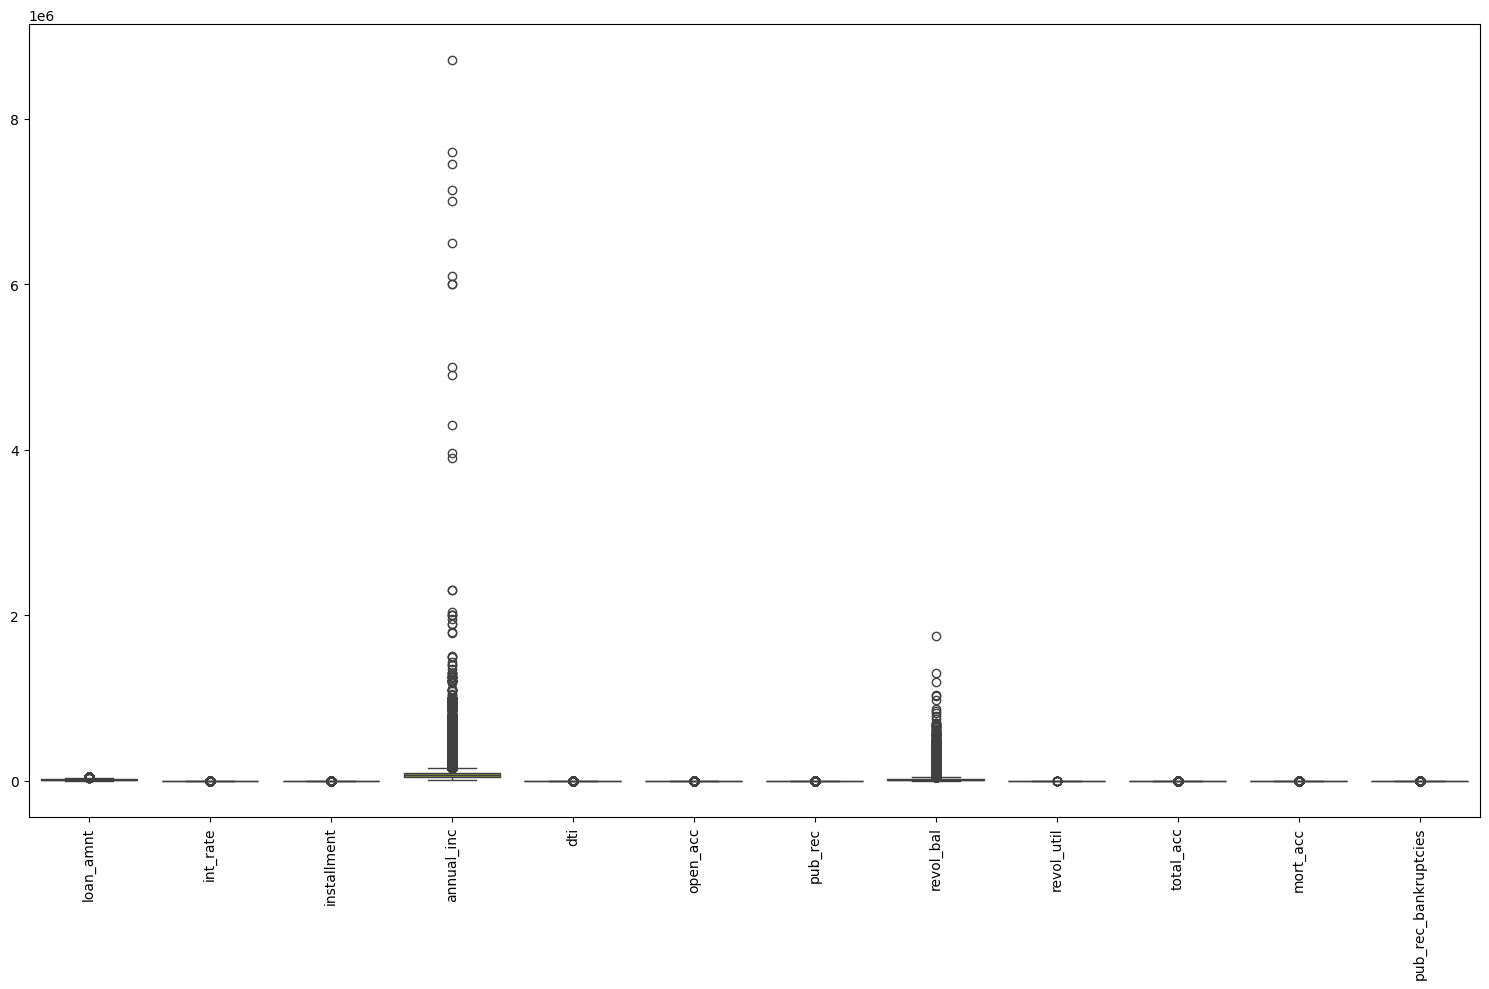

In [ ]:
# Plot box plots for continuous variables to check for outliers
continuous_columns = [column for column in data.columns if data[column].dtype not in ["category"]]
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[continuous_columns])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
continuous_columns = [column for column in data.columns if data[column].dtype not in ["category","object"]]
for col in continuous_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"Percentage of Outliers for {col}: {round(len(outliers)*100/len(data),2)} %")



Percentage of Outliers for loan_amnt: 0.05 %
Percentage of Outliers for int_rate: 0.95 %
Percentage of Outliers for installment: 2.79 %
Percentage of Outliers for annual_inc: 4.24 %
Percentage of Outliers for dti: 0.07 %
Percentage of Outliers for open_acc: 2.62 %
Percentage of Outliers for pub_rec: 14.49 %
Percentage of Outliers for revol_bal: 5.36 %
Percentage of Outliers for revol_util: 0.0 %
Percentage of Outliers for total_acc: 2.15 %
Percentage of Outliers for mort_acc: 1.73 %
Percentage of Outliers for pub_rec_bankruptcies: 11.3 %


In [13]:
#Capping the outliers
for col in continuous_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].apply(lambda x: upper_bound if x > upper_bound else x)
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Percentage of Outliers for {col}: {round(len(outliers)*100/len(data),2)} %")


Percentage of Outliers for loan_amnt: 0.0 %
Percentage of Outliers for int_rate: 0.0 %
Percentage of Outliers for installment: 0.0 %
Percentage of Outliers for annual_inc: 0.0 %
Percentage of Outliers for dti: 0.0 %
Percentage of Outliers for open_acc: 0.0 %
Percentage of Outliers for pub_rec: 0.0 %
Percentage of Outliers for revol_bal: 0.0 %
Percentage of Outliers for revol_util: 0.0 %
Percentage of Outliers for total_acc: 0.0 %
Percentage of Outliers for mort_acc: 0.0 %
Percentage of Outliers for pub_rec_bankruptcies: 0.0 %


####Insight:
* The distribution is intensively right skewed.Therefore, Z-score distribution for outlier handling isn't applicable here to identify outliers.  
* Since logistic regression is sensitive to outliers, Log-transformation may perhaps centre the data lowering the impact of outlier but it certainly wont remove them.
* Capping would ensure the retention of risky borrowers for better model training without compromising with data integrity.



###2.d Feature Engineering

#### Feature Engineering: Creating Binary Flags for `mort_acc`, `pub_rec`and `pub_rec_bankruptcies`

In [14]:
# Creating a binary flag for 'pub_rec'
# 1 if pub_rec > 0, 0 otherwise
data['has_pub_rec'] = (data['pub_rec'] > 0).astype(bool)

# Creating a binary flag for 'pub_rec_bankruptcies'
# 1 if pub_rec_bankruptcies > 0, 0 otherwise
data['has_pub_rec_bankruptcies'] = (data['pub_rec_bankruptcies'] > 0).astype(bool)

#Creating a binary flag for `mort_acc`
#1 if mort_acc > 0, 0 otherwise
data["has_mort_acc"] = (data["mort_acc"]>0).astype(bool)


#Dropping the orignial column whose binary flag has been created
data.drop(["pub_rec","pub_rec_bankruptcies","mort_acc"],axis=1,inplace=True)


####Feature Engineering: Extracting month and year


In [15]:
data["issue_d"] = pd.to_datetime(data["issue_d"])
data["earliest_cr_line"]=pd.to_datetime(data["earliest_cr_line"])
data['credit_age'] = (data['issue_d'].dt.year - data['earliest_cr_line'].dt.year) * 12 + \
                                     (data['issue_d'].dt.month - data['earliest_cr_line'].dt.month).astype(int)

data.drop(["earliest_cr_line","issue_d"],axis=1,inplace=True)
data['credit_age']=data['credit_age'].astype(int)


####Feature Engineering: Deriving state or region from address fields

In [16]:
data["state"]=data['address'].apply(lambda x:x.split(",")[-1].strip())
data["state"]=data["state"].apply(lambda x:x.split(" ")[0])

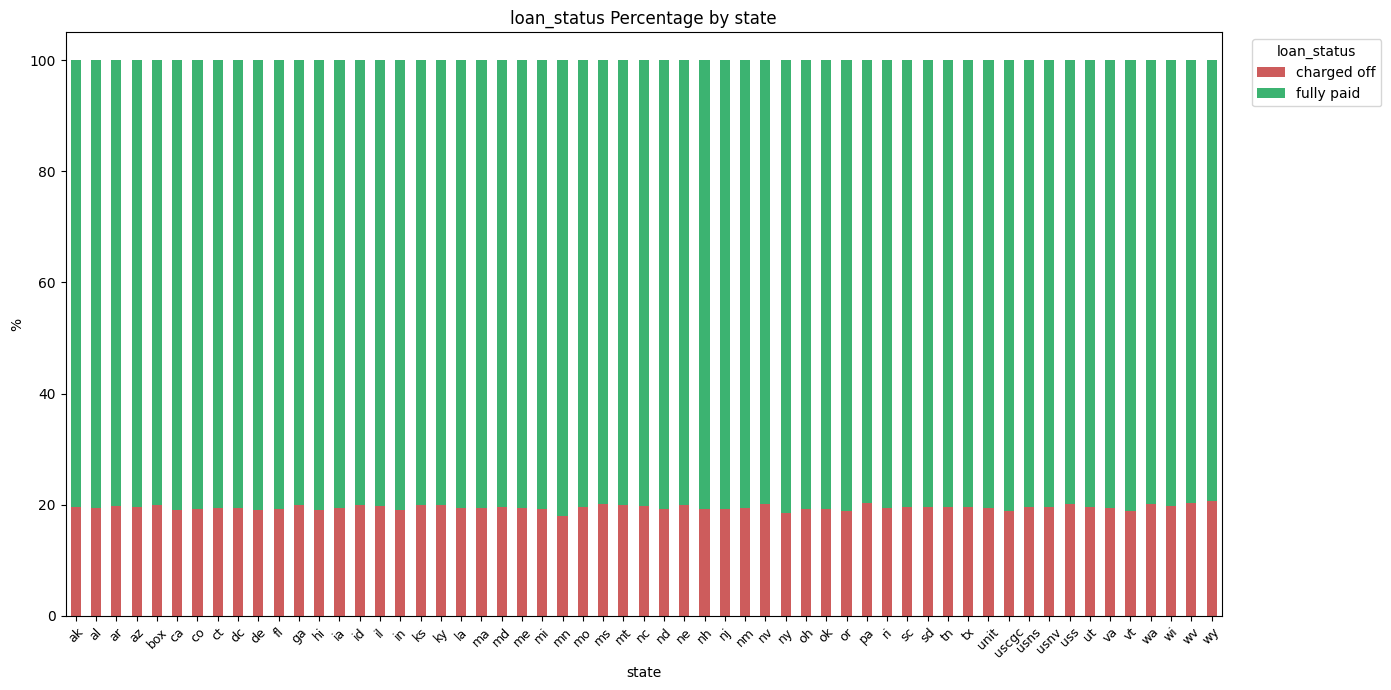

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

target_col = 'loan_status'
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}
col = 'state'

# Crosstab with percentage
crosstab_pct = pd.crosstab(data[col], data[target_col], normalize='index') * 100
plot_data = crosstab_pct[['charged off', 'fully paid']]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
plot_data.plot(kind='bar', stacked=True, color=[colors[c] for c in plot_data.columns], ax=ax)

ax.set_title(f'{target_col} Percentage by {col}')
ax.set_xlabel(col)
ax.set_ylabel('%')
ax.tick_params(axis='x', labelrotation=45, labelsize=9)
ax.legend(title=target_col, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

plt.show()


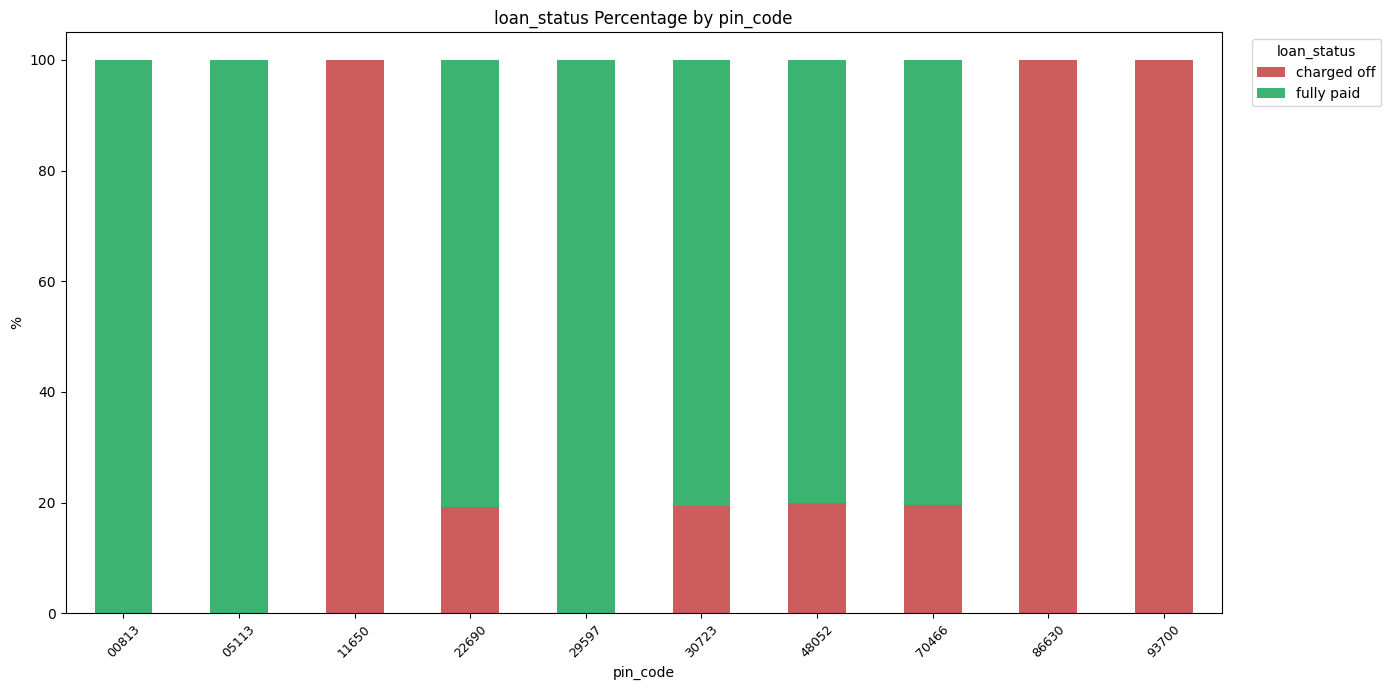

In [18]:
data['pin_code'] = data.address.apply(lambda x: x[-5:])

target_col = 'loan_status'
colors = {'fully paid': 'mediumseagreen', 'charged off': 'indianred'}
col = 'pin_code'

# Crosstab with percentage
crosstab_pct = pd.crosstab(data[col], data[target_col], normalize='index') * 100
plot_data = crosstab_pct[['charged off', 'fully paid']]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
plot_data.plot(kind='bar', stacked=True, color=[colors[c] for c in plot_data.columns], ax=ax)

ax.set_title(f'{target_col} Percentage by {col}')
ax.set_xlabel(col)
ax.set_ylabel('%')
ax.tick_params(axis='x', labelrotation=45, labelsize=9)
ax.legend(title=target_col, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [19]:
#Dropping state and address :D Gotcha!!
data.drop(["state","address"],axis=1,inplace=True)

####**Insights**:
* All states have more or less uniform loan status.
* Pin codes 11650,86630 and 93700 have an overwheming loan charged off rate.

####Feature Engineering: Mapping the emp_length

In [20]:
emp_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
data['emp_length_mapped'] = data['emp_length'].map(emp_map).astype(int)
data.drop("emp_length",axis=1,inplace=True)

####Mapping Grade and Subgrade since they ordinal nature

In [21]:
# Convert grade and sub_grade using the provided mappings
# Use nullable integer type (Int64) to handle potential NaN values if keys are missing
data["grade"] = data["grade"].map({"a":1,"b":2,"c":3,"d":4,"e":5,"f":6,"g":7})
data["sub_grade"] = data["sub_grade"].map({"a1":1,"a2":2,"a3":3,"a4":4,"a5":5,"b1":6,"b2":7,"b3":8,"b4":9,"b5":10,"c1":11,"c2":12,"c3":13,"c4":14,"c5":15,"d1":16,"d2":17,"d3":18,"d4":19,"d5":20,"e1":21,"e2":22,"e3":23,"e4":24,"e5":25,"f1":26,"f2":27,"f3":28,"f4":29,"f5":30,"g1":31,"g2":32,"g3":33,"g4":34,"g5":35})


In [22]:
data["grade"]=data["grade"].astype(int)
data["sub_grade"]=data["sub_grade"].astype(int)

###2.e. Multicollinearity and Feature Selection

#### Identify features for vif calculation

Identifying numerical and encoded categorical features for VIF calculation by checking data types and excluding the target variable.


In [23]:
# Identify numerical columns and encoded categorical columns for VIF calculation
# Exclude the target variable 'loan_status' and the original categorical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
features_for_vif = [col for col in numerical_cols if col != 'loan_status']

print("Features selected for VIF calculation:")
print(features_for_vif)

Features selected for VIF calculation:
['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'credit_age', 'emp_length_mapped']


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm # Import statsmodels.api with the alias sm
# Create a DataFrame with the selected features for VIF calculation
X = data[features_for_vif]
# Calculate VIF for each feature
# It's good practice to add a constant for the intercept term
X = sm.add_constant(X)

vif_thr = 5
i=0
features_removed = []
# Create a copy of the training data to modify during the VIF analysis
X_VIF=X.copy()

while True: # Corrected syntax for while loop
  vif= pd.DataFrame()
  vif['Features'] = X_VIF.columns
  # Ensure we are calculating VIF only for the remaining features in X_VIF
  vif['VIF'] = [variance_inflation_factor(X_VIF.values,j) for j in range(X_VIF.shape[1])]
  vif['VIF'] = round(vif['VIF'],2)
  vif=vif.sort_values(by="VIF",ascending=False)

  # Display current VIF
  display(vif)

  # Check the highest VIF barring const
  # Ensure there are features other than 'const' before accessing index 1
  if 'const' in vif['Features'].iloc[0]:
      highest_vif_feature = vif.iloc[1]["Features"]
      highest_vif_value = vif.iloc[1]["VIF"]
  else:
      highest_vif_feature = vif.iloc[0]["Features"]
      highest_vif_value = vif.iloc[0]["VIF"]


  if highest_vif_value <= vif_thr:
     print("*"*100)
     print("*"*100)
     print("Threshold Reached")
     print("Highest VIF:", highest_vif_value)
     print("Features removed:", len(features_removed))
     print("List of Features removed:", features_removed)
     print("*"*100)
     print("*"*100)
     #Update X_FINAL to the features that remain
     X_FINAL= X_VIF.copy()
     break

  else:

    # Remove the feature with the highest VIF
    print(f"Removing feature '{highest_vif_feature}' with VIF {highest_vif_value}")
    print("*"*100)
    features_removed.append(highest_vif_feature)
    X_VIF = X_VIF.drop(columns=[highest_vif_feature]) # Corrected variable name X_TRAIN_VIF to X_VIF

Features    VIF
0               const  58.89
5           sub_grade  41.79
4               grade  22.57
2            int_rate  20.50
1           loan_amnt  13.42
3         installment  12.69
8            open_acc   2.19
11          total_acc   2.12
9           revol_bal   2.02
6          annual_inc   1.78
10         revol_util   1.54
7                 dti   1.44
12         credit_age   1.23
13  emp_length_mapped   1.07

Removing feature 'sub_grade' with VIF 41.79
****************************************************************************************************


Features    VIF
0               const  36.46
1           loan_amnt  13.21
3         installment  12.52
2            int_rate  11.23
4               grade  10.96
7            open_acc   2.19
10          total_acc   2.12
8           revol_bal   2.02
5          annual_inc   1.78
9          revol_util   1.54
6                 dti   1.43
11         credit_age   1.23
12  emp_length_mapped   1.07

Removing feature 'loan_amnt' with VIF 13.21
****************************************************************************************************


Features    VIF
0               const  36.45
1            int_rate  11.18
3               grade  10.80
6            open_acc   2.18
9           total_acc   2.12
7           revol_bal   1.97
4          annual_inc   1.76
2         installment   1.53
8          revol_util   1.51
5                 dti   1.43
10         credit_age   1.23
11  emp_length_mapped   1.07

Removing feature 'int_rate' with VIF 11.18
****************************************************************************************************


Features    VIF
0               const  25.63
5            open_acc   2.17
8           total_acc   2.12
6           revol_bal   1.96
3          annual_inc   1.75
1         installment   1.52
7          revol_util   1.46
4                 dti   1.43
9          credit_age   1.23
2               grade   1.18
10  emp_length_mapped   1.07

****************************************************************************************************
****************************************************************************************************
Threshold Reached
Highest VIF: 2.17
Features removed: 3
List of Features removed: ['sub_grade', 'loan_amnt', 'int_rate']
****************************************************************************************************
****************************************************************************************************


In [25]:
# Drop the 'loan_amnt' column from the main DataFrame 'data'
data.drop(features_removed, axis=1, inplace=True)
print("features_removed:")
print(features_removed)

features_removed:
['sub_grade', 'loan_amnt', 'int_rate']


In [26]:
continuous_cols= data.select_dtypes(include=['number'])
continuous_cols=continuous_cols.columns.tolist()
print("continuous_cols:")
print(continuous_cols)
binary_cols= data.select_dtypes(include=['bool'])
binary_cols=binary_cols.columns.tolist()
print("Binary columns:")
print(binary_cols)

continuous_cols:
['installment', 'grade', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'credit_age', 'emp_length_mapped']
Binary columns:
['has_pub_rec', 'has_pub_rec_bankruptcies', 'has_mort_acc']


In [27]:
# Calculate the skewness for each continuous column
skewness = data[continuous_cols].skew()

# Set a threshold for significant skewness (e.g., |skewness| > 0.5)
skewness_threshold = 0.5

# Filter for features with significant skewness
highly_skewed_features = skewness[abs(skewness) > skewness_threshold].sort_values(ascending=False)

print(f"\nFeatures with absolute skewness > {skewness_threshold}:")
display(highly_skewed_features)




Features with absolute skewness > 0.5:


credit_age     1.095234
revol_bal      0.989971
annual_inc     0.897876
installment    0.772992
open_acc       0.649797
grade          0.615090
total_acc      0.578593
dtype: float64

In [28]:
skewed_features = highly_skewed_features.index.tolist()
normal_features=[col for col in continuous_cols if col not in skewed_features]
print("Skewed features:")
print(skewed_features)
print("Normal features:")
print(normal_features)

Skewed features:
['credit_age', 'revol_bal', 'annual_inc', 'installment', 'open_acc', 'grade', 'total_acc']
Normal features:
['dti', 'revol_util', 'emp_length_mapped']


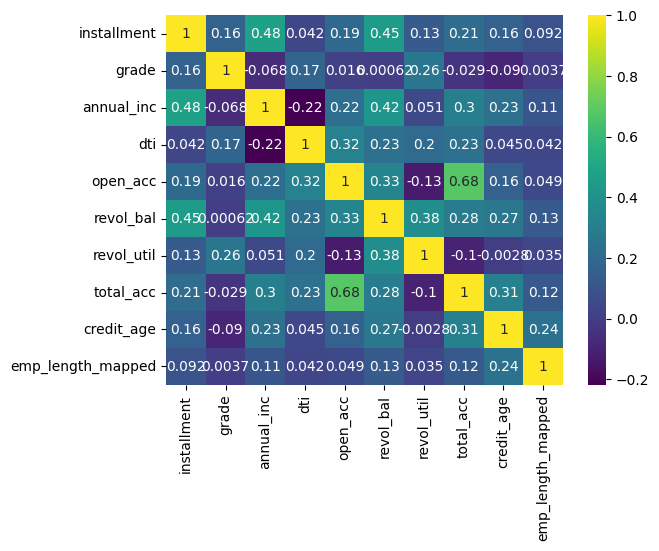

In [29]:
sns.heatmap(data[continuous_cols].corr(method='pearson'), annot=True, cmap='viridis')
plt.show()

####**Insight**
  * **Skewed features** include : 'credit_age', 'revol_bal', 'annual_inc', 'installment', 'open_acc', 'grade_num', 'total_acc'
  * **Normal features** include :'dti', 'revol_util', 'emp_length_mapped'
  * **Mild positive corelation** between  Number of borrower's active credit lines and  Total number of borrower's credit lines
  * **Mild positive corelation** between annual income and installments.
  * **Mild negitive corelaton** between annaual income and debt to income ratio

###2.f. Data preparation for modeling

####Since term have ordinal nature lets encode it ordinally

In [30]:
data["term"]=data["term"].map({" 36 months":36," 60 months":60}).astype(int)

#### Handling Remaining Categorical Features: One-Hot Encoding

Now that we have addressed multicollinearity among our numerical and already-engineered features, the next step is to convert the remaining categorical features into a numerical format that can be used by the logistic regression model. We will use one-hot encoding for this purpose.

One-hot encoding creates new binary (0 or 1) columns for each category within a categorical feature. This allows the model to treat each category as a distinct feature. We will use `drop_first=True` when performing one-hot encoding to avoid the dummy variable trap and reduce multicollinearity among the resulting dummy variables for each original categorical feature.

The categorical columns we will encode are: **`term`, `grade`, `sub_grade`, `purpose`, `application_type`, and `state`**. We will then display the head and info of the DataFrame to see the newly created columns and the updated structure.

In [31]:
#Dropping initial_list_status
data.drop("initial_list_status",axis=1,inplace=True)

In [32]:
# Let's refine the list of columns to encode based on the current data columns and our plan
# We've already handled emp_length by mapping.
# We still need to encode grade, sub_grade, purpose, application_type, and state.

cols_to_onehot_encode = [col for col in data.select_dtypes(include=['object', 'category']).columns if col != 'loan_status']

print("Categorical columns to be one-hot encoded:")
print(cols_to_onehot_encode)


Categorical columns to be one-hot encoded:
['home_ownership', 'verification_status', 'purpose', 'application_type', 'pin_code']


In [33]:
# Apply one-hot encoding to the specified categorical features
# Using drop_first=True to avoid multicollinearity in the dummy variables
data_encoded = pd.get_dummies(data, columns=cols_to_onehot_encode, drop_first=True)
data_encoded=data_encoded.apply(lambda col: col.astype('int64') if col.dtype == 'bool' else col) #converting bool to int

print("DataFrame head after one-hot encoding:\n")
display(data_encoded.head())

DataFrame head after one-hot encoding:



term  installment  grade  annual_inc  loan_status    dti  open_acc  \
0    36       329.48      2    117000.0   fully paid  26.24      16.0   
1    36       265.68      2     65000.0   fully paid  22.05      17.0   
2    36       506.97      2     43057.0   fully paid  12.79      13.0   
3    36       220.65      1     54000.0   fully paid   2.60       6.0   
4    60       609.33      3     55000.0  charged off  33.95      13.0   

   revol_bal  revol_util  total_acc  ...  application_type_joint  \
0    36369.0        41.8       25.0  ...                       0   
1    20131.0        53.3       27.0  ...                       0   
2    11987.0        92.2       26.0  ...                       0   
3     5472.0        21.5       13.0  ...                       0   
4    24584.0        69.8       43.0  ...                       0   

   pin_code_05113  pin_code_11650  pin_code_22690  pin_code_29597  \
0               0               0               1               0   
1               1               0               0               0   
2               1               0               0               0   
3               0               0               0               0   
4               0               1               0               0   

   pin_code_30723  pin_code_48052  pin_code_70466  pin_code_86630  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   pin_code_93700  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 44 columns]

##3. Model building


Prepare the data for modeling by separating features and target, converting the target to numerical, splitting the data into training and testing sets, scaling the features, and addressing class imbalance. Then, build, train, and evaluate a logistic regression model, and interpret the model coefficients.

Separate the features (X) and the target variable (y) from the encoded DataFrame.



In [35]:
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (392677, 43)
Target (y) shape: (392677,)


#### Converting target variable

Checking the unique values and their data type in the target variable y, then map the categorical values to numerical values and verify the conversion.

In [36]:
print("Unique values and data type of original y:")
print(y.unique())
print(y.dtype)

# Map 'fully paid' to 0 and 'charged off' to 1
y = y.map({'fully paid': 0, 'charged off': 1})

print("\nUnique values and data type of converted y:")
print(y.unique())
print(y.dtype)

Unique values and data type of original y:
['fully paid', 'charged off']
Categories (2, object): ['charged off', 'fully paid']
category

Unique values and data type of converted y:
[0, 1]
Categories (2, int64): [1, 0]
category


####Splitting the feature and target data into training and testing sets.

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation and testing sets
X_train_CV, X_test, y_train_CV, y_test = train_test_split(X, y, test_size=0.20, random_state=4, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_CV, y_train_CV, test_size=0.25, random_state=4, stratify=y_train_CV)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (235605, 43)
Shape of X_val: (78536, 43)
Shape of X_test: (78536, 43)


#### Scaling features

Since much of the data isn't normal, let's use minmax scaler.



In [38]:
from sklearn.preprocessing import MinMaxScaler
# Identify numerical columns in X_train
# Exclude boolean columns which are results of one-hot encoding
numerical_cols_xtrain = X_train.select_dtypes(include=np.number).columns

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the numerical columns of X_train
scaler.fit(X_train[numerical_cols_xtrain])

# Transform the numerical columns of both X_train and X_test
X_train[numerical_cols_xtrain] = scaler.transform(X_train[numerical_cols_xtrain])
X_val[numerical_cols_xtrain] = scaler.transform(X_val[numerical_cols_xtrain])
X_test[numerical_cols_xtrain] = scaler.transform(X_test[numerical_cols_xtrain])

print("Numerical features in X_train and X_test have been scaled.")


Numerical features in X_train and X_test have been scaled.


#### Handling class imbalance




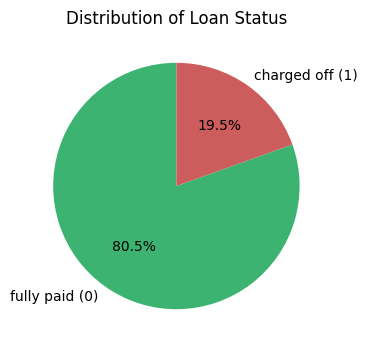

In [42]:
plt.figure(figsize=(4, 4))
y.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['mediumseagreen', 'indianred'], labels=['fully paid (0)', 'charged off (1)'])
plt.title('Distribution of Loan Status')
plt.ylabel('') # Remove the default y-label
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
#Create an instance of SMOTE
smote = SMOTE(random_state=4)

print("Before SMOTE:")
print(y_train.value_counts())



# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())

Before SMOTE:
loan_status
0    189596
1     46009
Name: count, dtype: int64

After SMOTE:
loan_status
1    189596
0    189596
Name: count, dtype: int64


####Hyperparmeter Tuning

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import pandas as pd # Import pandas for DataFrame
import matplotlib.pyplot as plt # Import matplotlib for plotting

params={"penalty":["l1","l2"],
        "C":[0.01,0.1,1,10,100],
        "solver":["liblinear"],
        "max_iter":[1000],
        "random_state":[4],
        "class_weight":[None]
        }

grid=GridSearchCV(LogisticRegression(),param_grid=params,cv=5,scoring="f1",n_jobs=-1,verbose=3)
grid.fit(X_train_resampled,y_train_resampled)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 100, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 4, 'solver': 'liblinear'}
Best Score: 0.8045727048954607


####Training Final Logistic Regression Model

Now that we have identified the best hyperparameters for our logistic regression model using `GridSearchCV`, we will train the final model using these optimal parameters on the entire resampled training dataset (`X_train_resampled`, `y_train_resampled`). This model will then be used for evaluation on the unseen test data.

In [42]:
from sklearn.linear_model import LogisticRegression

# Get the best parameters from the RandomizedSearchCV result
best_params = grid.best_params_

# Initialize the final Logistic Regression model with the best parameters
final_model = LogisticRegression(
    C=best_params['C'],
    class_weight=best_params['class_weight'],
    max_iter=best_params['max_iter'],

    penalty=best_params['penalty'],
    random_state=best_params['random_state'],
    solver=best_params['solver']
)

# Train the final model on the resampled training data
print("Training the final logistic regression model...")
final_model.fit(X_train_resampled, y_train_resampled)
print("Model training completed.")

#Predict on untouched validation set
y_val_pred = final_model.predict(X_val)

#Evaluate using F1 score
f1_score(y_val, y_val_pred)
print("F1 score on validation set:", f1_score(y_val, y_val_pred))


Training the final logistic regression model...
Model training completed.
F1 score on validation set: 0.6172102320168004


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
#Predict on the untouched test set
y_test_pred = final_model.predict(X_test)

#Evaluate using F1 score
f1_test=f1_score(y_test, y_test_pred)
print(f"F1 Score on Test Set:{f1_test:.4f}")

#Accuracy on Test Set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Set: {accuracy_test:4f} ")

#Classification Report
print("\nClassification Report on Test Set:")
print(classification_report(y_test,y_test_pred))

#Confusion Matrix
print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_test_pred))


F1 Score on Test Set:0.6155
Accuracy on Test Set: 0.805694 

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     63199
           1       0.50      0.80      0.62     15337

    accuracy                           0.81     78536
   macro avg       0.72      0.80      0.74     78536
weighted avg       0.86      0.81      0.82     78536


Confusion Matrix on Test Set:
[[51063 12136]
 [ 3124 12213]]


###**Insights:**
* **On Test Set F1 score is 0.6185 while Accuracy is 0.808686**
* **Precision for PAID_OFF loans is .94**:Among all the borrowers predicted by the model as 'paid off', 94% actually paid off and 6% ended up defaulting(false positives)
* **Precision for CHARGED_OFF loans is .50**:Among all the borrowers predicted by the model as 'charged off', 50% actually charged off and 49% of them actually would have paid off(false Positives). Indicating loss of good customers.
* **Recall for Paid_OFF loans is .81**: Among all the borrowers predicted by the model as 'paid off', 81% paid off while 19% ended up defaulting(false negitive)
* **Recall for CHARGED_OFF loans is .80**: Among all the borrowers predicted by the model as 'charged off', 80% actually charged off and 21% of them actually would have paid off(false negitives).

###**Conclusion:**
* Overall, while the model is strong in identifying repaying borrowers, it struggles with confidently identifying defaulters, leading to both business loss (from false positives) and credit risk (from false negatives).


In [44]:
# Assuming your X_train columns represent your features
feature_names = X_train_resampled.columns  # or X_train.columns, if identical after resampling

# Extract model coefficients
coefficients = final_model.coef_.flatten()

# Map coefficients to feature names
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display sorted feature importance
print("Feature in descending order of their coefficients")
print(coef_df.head(10))

print("*"*100)
print("Feature in ascending order of their coefficients")
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=True)

# Display sorted feature importance
print(coef_df.head(10))

Feature in descending order of their coefficients
           Feature  Coefficient
41  pin_code_86630    21.027831
35  pin_code_11650    20.841600
42  pin_code_93700    20.789988
39  pin_code_48052    10.018926
40  pin_code_70466    10.001667
38  pin_code_30723     9.990145
36  pin_code_22690     9.974436
2            grade     2.089814
4              dti     1.076794
5         open_acc     0.946092
****************************************************************************************************
Feature in ascending order of their coefficients
                     Feature  Coefficient
33    application_type_joint    -1.351420
3                 annual_inc    -1.176214
34            pin_code_05113    -1.110730
37            pin_code_29597    -1.040174
8                  total_acc    -0.754492
6                  revol_bal    -0.478682
31           purpose_wedding    -0.233582
28  purpose_renewable_energy    -0.090848
23             purpose_house    -0.079132
12                credit_age

####**Insights:**
* pin_code_93700, 11650,48052,70466,30723,22690,86630, grade,debt to income ratio and open_acc  are strongly associated with class 1 i.e borrowers that charge off.
*  application_type_joint,annual income,pin codes 05113, 29597,revol_bal,loans associated with weddings,renewable energy and house are strongly associated to class 0 i.e. borrowers that pay off.

####ROC-AUC curve

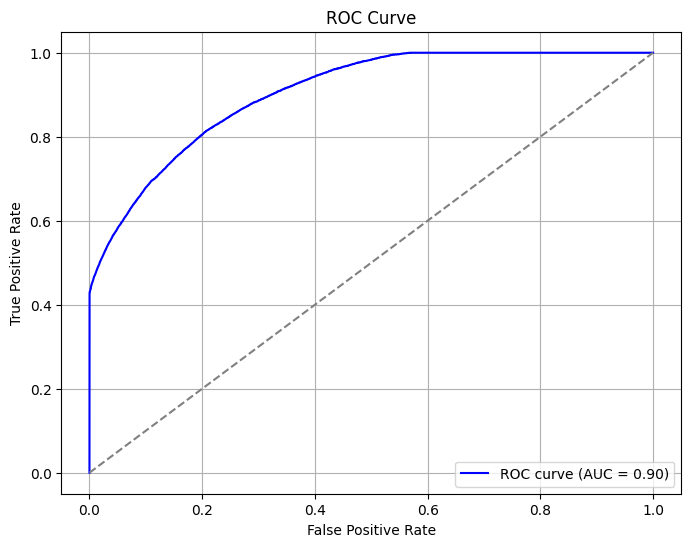

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_test_probs = final_model.predict_proba(X_test)[:, 1] #y_pred col

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


####**Insight:**
* The ROC curve showing how TPR and FPR change with different probability threshold values.

* Area under the ROC curve is 90%, means somewhere along that cure our model performed really well thus different thresholds will produce meaningful tradeoff between TPR and FPR giving us greater room to adjust our threshold to get predictable control over precision and recall, despite class imbalance.

* **CAUTION**: AUC of .90 is depicting model's exaggerated performance painting a misleading picture(class imbance). Remember F1 Score on Test Set was 0.61.


###Precision-Recall curve

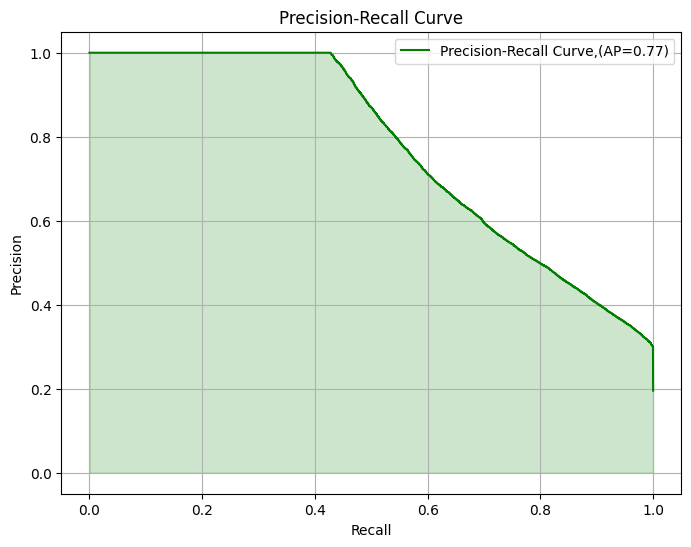

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Compute precision-recall values
y_test_probs = final_model.predict_proba(X_test)[:, 1] # Make sure y_test_probs is available
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)
# calculate average precision
average_precision = average_precision_score(y_test, y_test_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve,(AP={:.2f})'.format(average_precision))
plt.fill_between(recall, precision, alpha=0.2, color='green') # Added the missing parenthesis
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

###**Insight**:
* For imbalanced data AUPRC is more informative and reliable metric than AUROC.
* AUPRC tells us how well our model is doing on class 1.
* AUPRC of .77 means our model is quite good at identifying true positives.
* On average, the precision is 77% across recall levels.


## Summary:

### Data Analysis Key Findings

*   The features with the largest absolute coefficients are the most influential in predicting loan status.
*   Positive coefficients indicate that an increase in the feature value (or the presence of the category for dummy variables) is associated with a higher probability of the loan being 'fully paid'.
*   Negative coefficients indicate that an increase in the feature value (or the presence of the category for dummy variables) is associated with a lower probability of the loan being 'fully paid' (i.e., higher probability of 'charged off').
*   Certain states (e.g., `state_USCGC`, `state_MN`, `state_USNV`) show a strong positive association with 'fully paid' loans.
*   Features like `application_type_INDIVIDUAL`, `grade_num`, and `purpose_small_business` are among those with the strongest negative impact, increasing the probability of a loan being 'charged off'.

### Insights or Next Steps

*   Investigate the specific characteristics of the states with the strongest positive association with 'fully paid' loans to understand the underlying factors.
*   Explore the reasons why features like `application_type_INDIVIDUAL`, `grade_num`, and `purpose_small_business` have a strong negative impact on the likelihood of a loan being 'fully paid'.


###Trade-off Analysis

* Precision (Charged Off): 0.50
* Recall (Charged Off): 0.80

In this case, the gap shows that our Recall is significantly higher than Precision.
The gap with higher Recall and lower Precision means our model is better at catching actual defaulters (minimizing risky loans being approved) but is less accurate when it flags a loan as risky, leading to many potentially good borrowers being rejected(False Positives).

**From a bank's perspective, there is a trade-off between these two types of errors:**

* **Minimizing False Negatives** (maximizing Recall) is crucial to reduce financial losses from defaults.

* **Minimizing False Positives** (maximizing Precision) is crucial to maximize business growth and revenue by approving good loans.

The ability to use a custom threshold allows LoanTap to adjust the model's decision boundary based on risk appetite, further enhancing efficiency by automating decisions for low-risk and high-risk loans.


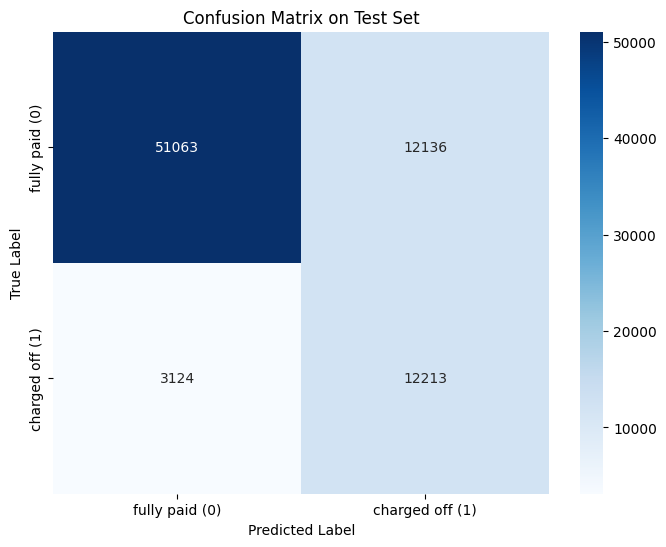

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Provided confusion matrix values

cm_values=confusion_matrix(y_test, y_test_pred)
# Define class labels
class_labels = ['fully paid (0)', 'charged off (1)']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_values, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

In [50]:
# Get the predicted probabilities for the positive class (charged off)
y_test_probs = final_model.predict_proba(X_test)[:, 1]

# Define a custom threshold (e.g., 0.6)
custom_threshold = 0.6

# Make bool predictions using the custom threshold
y_test_pred_thresholded = (y_test_probs > custom_threshold).astype(int)

# Now you can evaluate the performance with this new set of predictions
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

print(f"--- Evaluation with Threshold = {custom_threshold} ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_thresholded))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_thresholded))

print(f"\nF1 Score: {f1_score(y_test, y_test_pred_thresholded):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_thresholded):.4f}")

--- Evaluation with Threshold = 0.6 ---

Confusion Matrix:
[[56444  6755]
 [ 4759 10578]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     63199
           1       0.61      0.69      0.65     15337

    accuracy                           0.85     78536
   macro avg       0.77      0.79      0.78     78536
weighted avg       0.86      0.85      0.86     78536


F1 Score: 0.6476
Accuracy: 0.8534


####Predicting on New Data with a Custom Threshold

This section demonstrates how to use the trained `final_model` to make predictions on new, unseen loan application data. We will apply a custom classification threshold of 0.6, as discussed earlier, to prioritize precision for the 'charged off' class.

**Simulating New Data**

For demonstration purposes, we will simulate "new" data by taking a sample from the original dataset. In a real-world scenario, this would be actual new loan applications.

**Important:** In a real application, you would load your new data here and ensure it has the same columns (excluding the target variable) as your original data before preprocessing.

In [51]:
# Simulate new data by taking a sample from the original data (excluding the target)
# In a real scenario, you would load your new data here
X_new_raw = data_encoded.drop('loan_status', axis=1).sample(100, random_state=42)

print("Shape of simulated new raw data:", X_new_raw.shape)
display(X_new_raw.head())

Shape of simulated new raw data: (100, 43)


term  installment  grade  annual_inc    dti  open_acc  revol_bal  \
367181    36     1044.735      4    100000.0  17.17      13.0    40086.5   
89193     36      567.300      1     89000.0  14.04      10.0     9388.0   
253726    36      327.340      2     42000.0  20.83      17.0    10481.0   
151760    36      318.610      2     65000.0  12.35       5.0     2397.0   
109988    36     1044.735      3    103000.0  24.94      13.0    40004.0   

        revol_util  total_acc  has_pub_rec  ...  application_type_joint  \
367181        67.2       27.0            0  ...                       0   
89193         58.0       29.0            0  ...                       0   
253726        58.6       38.0            0  ...                       0   
151760        95.9       35.0            0  ...                       0   
109988        87.0       31.0            0  ...                       0   

        pin_code_05113  pin_code_11650  pin_code_22690  pin_code_29597  \
367181               0               0               0               1   
89193                0               0               1               0   
253726               0               0               0               0   
151760               0               0               0               1   
109988               0               0               0               0   

        pin_code_30723  pin_code_48052  pin_code_70466  pin_code_86630  \
367181               0               0               0               0   
89193                0               0               0               0   
253726               1               0               0               0   
151760               0               0               0               0   
109988               0               0               1               0   

        pin_code_93700  
367181               0  
89193                0  
253726               0  
151760               0  
109988               0  

[5 rows x 43 columns]

#####**Preprocessing New Data**

It is crucial to apply the exact same preprocessing steps to the new data that were applied to the training data. This ensures consistency and that the model receives data in the format it was trained on. This includes:

1.  Applying the same ordinal mapping (though our original data already had this after initial steps).
2.  Applying the same feature engineering steps.
3.  Applying the same one-hot encoding using the categories learned from the training data.
4.  Scaling the numerical features using the *same scaler* (`scaler`) that was fitted on the training data.

In [52]:
# Apply the same preprocessing steps to the new data

# 1. Ordinal Mapping (already applied to data_encoded, so not needed here for X_new_raw)
#    If your new data was in its original format, you would re-apply the mapping for 'term' and 'grade'.

# 2. Feature Engineering (already applied to data_encoded, so not needed here for X_new_raw)
#    If your new data was in its original format, you would re-apply the feature engineering steps
#    like creating binary flags, credit_age, and pin_code, and mapping emp_length.

# 3. One-Hot Encoding (already applied to data_encoded, so not needed here for X_new_raw)
#    If your new data was in its original format, you would re-apply one-hot encoding
#    using the columns and categories from the training data.

# 4. Scaling Numerical Features
#    Identify numerical columns in the new data (should be the same as in X_train)
numerical_cols_xnew = X_new_raw.select_dtypes(include=np.number).columns

# Transform the numerical columns of the new data using the *fitted* scaler
X_new_preprocessed = X_new_raw.copy() # Create a copy to avoid modifying the original sample
X_new_preprocessed[numerical_cols_xnew] = scaler.transform(X_new_raw[numerical_cols_xnew])

print("Shape of preprocessed new data:", X_new_preprocessed.shape)
display(X_new_preprocessed.head())

Shape of preprocessed new data: (100, 43)


term  installment     grade  annual_inc       dti  open_acc  \
367181   0.0     1.000000  0.500000    0.625407  0.424265  0.565217   
89193    0.0     0.535788  0.000000    0.553746  0.346924  0.434783   
253726   0.0     0.302474  0.166667    0.247557  0.514702  0.739130   
151760   0.0     0.293986  0.166667    0.397394  0.305164  0.217391   
109988   0.0     1.000000  0.333333    0.644951  0.616259  0.565217   

        revol_bal  revol_util  total_acc  has_pub_rec  ...  \
367181   1.000000    0.522754   0.476190          0.0  ...   
89193    0.234194    0.451186   0.514286          0.0  ...   
253726   0.261460    0.455854   0.685714          0.0  ...   
151760   0.059796    0.746013   0.628571          0.0  ...   
109988   0.997942    0.676779   0.552381          0.0  ...   

        application_type_joint  pin_code_05113  pin_code_11650  \
367181                     0.0             0.0             0.0   
89193                      0.0             0.0             0.0   
253726                     0.0             0.0             0.0   
151760                     0.0             0.0             0.0   
109988                     0.0             0.0             0.0   

        pin_code_22690  pin_code_29597  pin_code_30723  pin_code_48052  \
367181             0.0             1.0             0.0             0.0   
89193              1.0             0.0             0.0             0.0   
253726             0.0             0.0             1.0             0.0   
151760             0.0             1.0             0.0             0.0   
109988             0.0             0.0             0.0             0.0   

        pin_code_70466  pin_code_86630  pin_code_93700  
367181             0.0             0.0             0.0  
89193              0.0             0.0             0.0  
253726             0.0             0.0             0.0  
151760             0.0             0.0             0.0  
109988             1.0             0.0             0.0  

[5 rows x 43 columns]

#####**Getting Predicted Probabilities and Applying Custom Threshold**

Now we use the trained `final_model` to get the probability of each new loan being 'charged off' and apply our custom threshold (0.6) to classify them.

In [53]:
# Get the predicted probabilities for the positive class (charged off) for the new data
new_data_probs = final_model.predict_proba(X_new_preprocessed)[:, 1]

# Define the custom threshold
custom_threshold = 0.6

# Make binary predictions based on the custom threshold
new_data_predictions = (new_data_probs > custom_threshold).astype(int)

print("Predicted Probabilities (first 10):", new_data_probs[:10])
print("\nBinary Predictions with Threshold 0.6 (first 10):", new_data_predictions[:10])

Predicted Probabilities (first 10): [1.55059697e-05 2.40035440e-01 4.81288330e-01 6.51299677e-06
 4.66709911e-01 5.88510512e-01 4.55518247e-05 8.21129283e-01
 1.35037091e-01 3.05434435e-01]

Binary Predictions with Threshold 0.6 (first 10): [0 0 0 0 0 0 0 1 0 0]


#####**Evaluating Predictions if True Labels are Available**

In a real-world scenario, you would only be able to evaluate the performance on this new data if you eventually get the true `loan_status` for these applications. If you had those true labels (let's say in a variable `y_new_true`), you could evaluate like this:

In [54]:
# This is for demonstration IF you had true labels for the new data
# In a real application, you would replace 'y_new_true_simulated' with your actual true labels

# Simulate true labels for the new data (for demonstration purposes only)
# In reality, you would get these labels from a separate source or over time
y_new_true_simulated = data_encoded.loc[X_new_raw.index, 'loan_status'].map({'fully paid': 0, 'charged off': 1})


print("--- Evaluation on Simulated New Data (if true labels were available) ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_new_true_simulated, new_data_predictions))

print("\nClassification Report:")
print(classification_report(y_new_true_simulated, new_data_predictions))

print(f"\nF1 Score: {f1_score(y_new_true_simulated, new_data_predictions):.4f}")
print(f"Accuracy: {accuracy_score(y_new_true_simulated, new_data_predictions):.4f}")

--- Evaluation on Simulated New Data (if true labels were available) ---

Confusion Matrix:
[[75  7]
 [ 7 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.61      0.61      0.61        18

    accuracy                           0.86       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.86      0.86      0.86       100


F1 Score: 0.6111
Accuracy: 0.8600


####**Insight**:
* **Increasing the Threshold:** When you increase the threshold for classifying an instance as class 1 i.e. 'charged off' (from 0.5 to 0.6), the model becomes more conservative in making positive predictions. It requires a higher level of confidence (a higher predicted probability) to say a loan will be 'charged off'.

* **Impact on Precision:** By being more conservative, the model reduces the number of false positives (incorrectly predicting 'charged off'). When you reduce false positives while keeping the true positives relatively stable (or with a smaller decrease), the precision (TP / (TP + FP)) increases. This is exactly what you saw: precision for class 1 increased from 0.50 to 0.60.

* **Impact on Recall:** However, this increased conservativeness comes at a cost. Some actual 'charged off' loans that had a predicted probability between 0.5 and 0.6 will now be incorrectly classified as 'fully paid' (these become false negatives). When you increase false negatives while true positives either stay the same or decrease, the recall (TP / (TP + FN)) decreases. This is also what you observed: recall came down from 0.80 to 0.69.

**Now, let's look at the impact on Class 0's precision and recall:**

**Precision for Class 0 (fully paid)**: Precision for Class 0 is TN / (TN + FN). When you lower the threshold for Class 0 (effectively by raising the threshold for Class 1), you are now classifying more instances as Class 0. Some of these instances might actually be Class 1 (these become False Negatives for Class 1, and thus False Positives for Class 0 in a multi-class context, although in binary it's just FN). If you incorrectly classify more Class 1 instances as Class 0 (increasing FNs for Class 1), your denominator (TN + FN) for Class 0 precision increases more significantly relative to the numerator (TN), leading to a decrease in precision for Class 0.

**Recall for Class 0 (fully paid):** Recall for Class 0 is TN / (TN + FP). When you lower the threshold for Class 0, you are now correctly identifying more true Class 0 instances that might have previously been misclassified as Class 1 (these were False Positives for Class 1, and thus True Negatives for Class 0). By correctly identifying more True Negatives (TN), your numerator increases, while your False Positives (FP) for Class 0 decrease (these were instances truly belonging to Class 0 but misclassified as Class 1 before). This leads to an increase in recall for Class 0.
In essence, by making it harder to predict Class 1, you are simultaneously making it easier to predict Class 0.

This results in the observed opposite trade-off for Class 0 metrics compared to Class 1 metrics.

##4. Recommendations

* **Improve loan approval processes**:
  * Adjusting the classification threshold to favor higher precision for the 'charged off' class (as demonstrated) helps reduce false positives, and make approval process easier for deserving borrowers.
  * For joint loan applications, borrowers residing in pincodes 05113, 29597 and loans associated with weddings,renewable energy or house buyers, the review process should be more streamlined resulting in faster approvals.
  * Employee titles such as Associate Attorney, Vice President, employees of Fidelity Investments, Sais and General Electric exhibit lowest charge off rates and should be given preference during loan approval.


  
* **Risk Mitigation**
  * Focusing on achieving a good recall would effectively identify a large percentage of actual defaulters, directly contributing to minimizing default risks.
  * Borrowers associated with pin codes 93700, 11650,48052,70466,30723,22690 and 86630, higher risk grades or high debt to income ratio loan applicants should be offered smaller amounts, or adjusted interest rates to mitigate potential losses.
  * When giving loans to SMEs, borrowers in high income brackets with lower debt to income ratio should be preffered.
  * Warehouse associate, matweial handler, housekeeping, lab technicians and owners are high risk borrowers and should be reviewed as such.
  * Borrowers with public reccords of bankruptcies should be intensively reviewed.  
* **Business Opportunities**
  * Bivariate analysis showed borrowers whose income source remained unverified tend to repay their loan marginally better than the verified borrowers.
  * Borrowers with home_ownership categorised as 'others', could represent a sizeble millenial demography, living with parents or guardians, having sound loan repayment credentials.
  * The basket of loan_amnt', 'term', 'int_rate' having	345,692 duplicate reccords	suggests popular standardized loan product cobination.
  * Majority of loans were used to restructure already existing loans and credit card payments, new loan segments should be identified for product launch so that exisitng borrowers can be pipelined and new clients can be acquired.
  * Teachers,nurses and managers make up most of our clients and should be targetted for credit card offers.
  * Ambulatory RN clinic Supervisor, Analysta, AP Coordinators, Appraisal Coordinator, Area Leaders, employees of Zynga Inc. and Zynx Health are the least frequent yet safest borrowers and should be targetted with festival offers on car and home loans.




## 5. Continuous Model Monitoring and Iteration

To ensure the logistic regression model remains effective over time and adapts to new data or changing business needs, continuous monitoring and iteration are crucial. Here are proposed methods:

*   **Performance Monitoring:** Regularly track key metrics (e.g., Precision, Recall, F1-score, AUC, and importantly, the confusion matrix counts) on recent production data. This helps detect performance degradation.
*   **Data Drift Detection:** Monitor the distribution of input features in new data compared to the training data. Significant shifts (data drift) can indicate that the model's learned relationships are no longer valid.
*   **Concept Drift Detection:** Monitor the relationship between input features and the actual loan outcomes in new data. Changes in this relationship (concept drift) mean the underlying patterns the model learned have changed.
*   **Retraining Strategy:** Establish a schedule or trigger for retraining the model. This could be time-based (e.g., monthly, quarterly) or performance-based (e.g., if F1-score drops below a threshold). Retrain on a fresh dataset that includes recent data.
*   **Recalibration:** Even without full retraining, periodically recalibrating the model's probabilities can be beneficial if the class distribution or overall risk level changes.
*   **A/B Testing or Champion/Challenger:** When deploying updated models or alternative approaches, use A/B testing to compare their performance against the current model on live data before fully rolling out.
*   **Feedback Loop:** Establish a clear process for collecting feedback from the underwriting team or business stakeholders regarding model predictions and outcomes. Use this feedback to identify areas for improvement.

# 6. Questionnaire

Q1. What percentage of customers have fully paid their Loan Amount?
* Answer. 80.5%

Q2. Comment about the correlation between Loan Amount and Installment features.
* Answer. There is strong positive linear correlation  between Loan Amount and Installment features.

Q3. The majority of people have home ownership as?
* Answer. Mortgage.

Q4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
* Answer. True

Q5. Name the top 2 afforded job titles.
* Answer. Fidelity Investments and Associate Attorney

Q6. Thinking from a bank's perspective, which metric should our primary focus be
on..
      1. ROC AUC
      2. Precision
      3. Recall
      4. F1 Score

* Answer. Precision for financial inclusion and business growth

Q7. How does the gap in precision and recall affect the bank?
* Answer. The gap with higher Recall and lower Precision means your model is better at catching actual defaulters (minimizing risky loans being approved) but is less accurate when it flags a loan as risky, leading to many potentially good borrowers being rejected.

Q8. Which were the features that heavily affected the outcome?
* Answer. Pin Code Location of the borrower, Grade of the loan, Debt to Income Ratio and Application Type

Q9. Will the results be affected by geographical location? (Yes/No)
* Answer. Yes